Forecasting Procedure

    - Choose a Model
    - Split data into train and test sets
    - Fit model on training set
    - Evaluate model on test set
    - Re-fit model on entire data set
    - Forecast for future data

Notebook section Overview

    - Intro to Forecasting
    - ACF (Auto Correlation Function) and PACF(Partial Auto Correlation Function) plots
    - AutoRegression - AR
    - Descriptive Statistics and Tests
    - Choosing ARIMA orders
    - ARIMA based models

In [153]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Data/airline_passengers.csv",
                 index_col='Month',
                 parse_dates=True)
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [3]:
# Set index frequency - 'MS'
df.index.freq = 'MS'

In [4]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [5]:
# Train test split... 
# For these analysis the Test sets will be the most recent end of the data

train_data = df.iloc[:109]  #df.loc[:'1955-01-01']
test_data = df.iloc[108:]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(
    train_data['Thousands of Passengers'],
    trend = 'mul',
    seasonal = 'mul',
    seasonal_periods = 12   # 12 enteries per seasonal period
).fit()

c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [7]:
# forcast on test data
# test_preds = fitted_model.forecast(12) # forcast for 12 months
test_preds = fitted_model.forecast(36)

In [8]:
test_preds

1958-02-01    339.143009
1958-03-01    399.281722
1958-04-01    394.233627
1958-05-01    402.545241
1958-06-01    473.128692
1958-07-01    521.795312
1958-08-01    514.513663
1958-09-01    446.216941
1958-10-01    385.431071
1958-11-01    339.645187
1958-12-01    381.455745
1959-01-01    401.210224
1959-02-01    387.159215
1959-03-01    455.812426
1959-04-01    450.049617
1959-05-01    459.537998
1959-06-01    540.114725
1959-07-01    595.671614
1959-08-01    587.359022
1959-09-01    509.392781
1959-10-01    440.000786
1959-11-01    387.732492
1959-12-01    435.462630
1960-01-01    458.013968
1960-02-01    441.973603
1960-03-01    520.346805
1960-04-01    513.768091
1960-05-01    524.599847
1960-06-01    616.584706
1960-07-01    680.007396
1960-08-01    670.517898
1960-09-01    581.513120
1960-10-01    502.296537
1960-11-01    442.628045
1960-12-01    497.115864
1961-01-01    522.860042
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

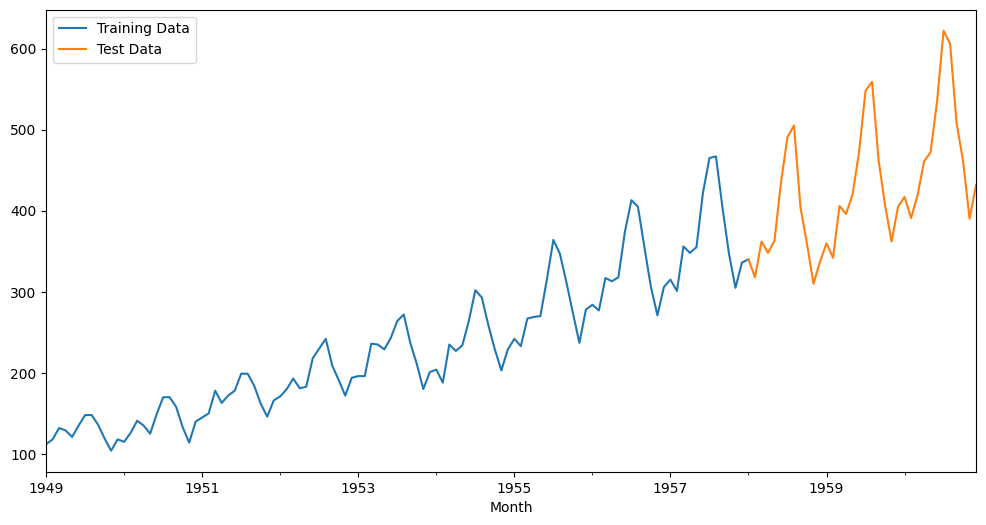

In [9]:
# Plotting
train_data['Thousands of Passengers'].plot(legend=True,
                                            label='Training Data',
                                            figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,
                                            label='Test Data',
                                            figsize=(12,6))

<Axes: xlabel='Month'>

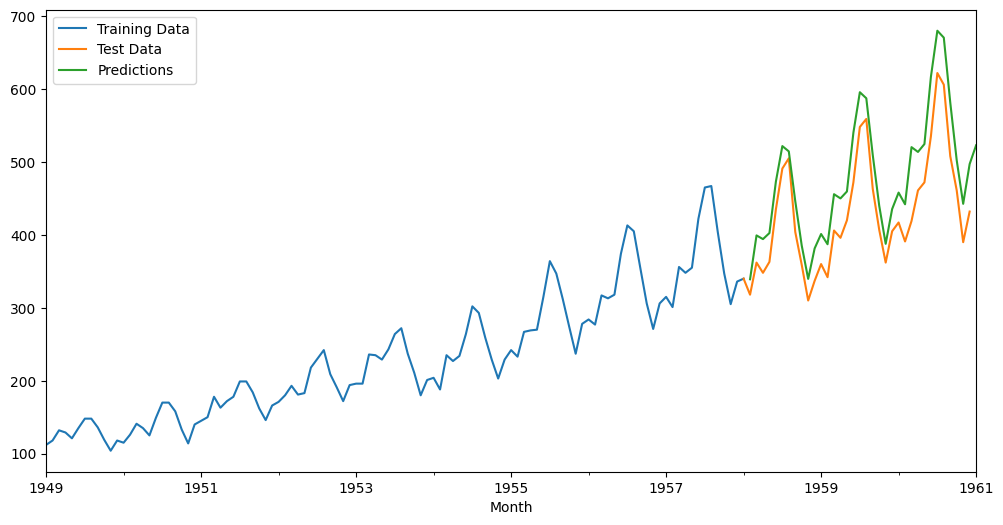

In [10]:
train_data['Thousands of Passengers'].plot(legend=True,
                                            label='Training Data',
                                            figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,
                                            label='Test Data',
                                            figsize=(12,6))
test_preds.plot(legend=True, 
                label = 'Predictions')

<Axes: xlabel='Month'>

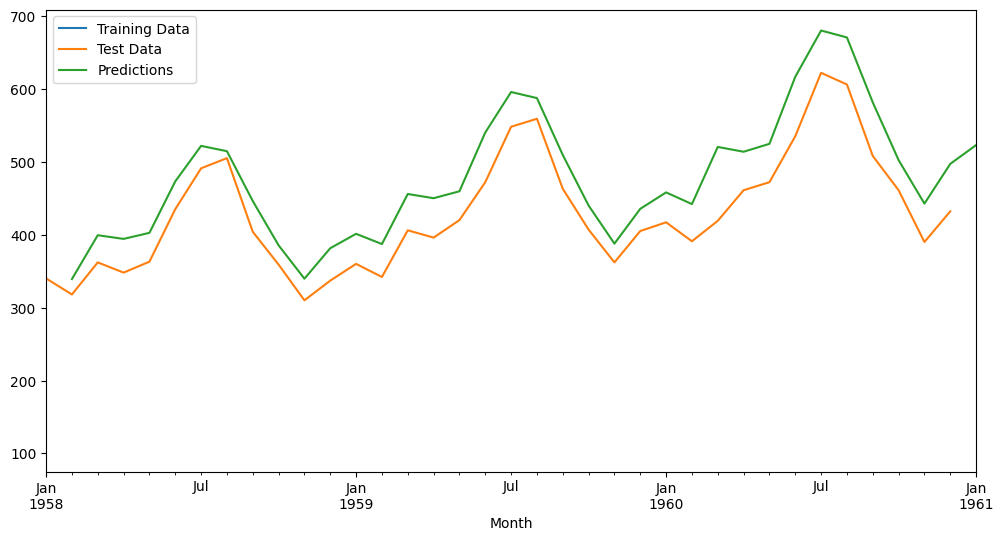

In [11]:
train_data['Thousands of Passengers'].plot(legend=True,
                                            label='Training Data',
                                            figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,
                                            label='Test Data',
                                            figsize=(12,6))
test_preds.plot(legend=True, 
                label = 'Predictions',
                xlim=['1958-01-01','1961-01-01'])

Evaluate Forecast Predictions

Note: Metrics such as accuracy, precision, recall are not useful for time series forecasting problems, as those evalute classification problems,and we need metrics designed for **continous** values! 

    Thus we use the most common evaluation metrics for Regression:
        - **Mean Absolute Error** - mean of the absolute value of errors
        - **Mean Squared Error** - mean of the squared errors. Larger errors are noted more than with MAE
        - **Root Mean Square Error** - root of the mean of the squared errors. Most popular

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

In [14]:
mean_absolute_error(test_data,test_preds)

63.03110341953488

In [15]:
mean_squared_error(test_data,test_preds)

5614.25352802898

In [17]:
np.sqrt(mean_squared_error(test_data,test_preds))

74.92832260253115

In [18]:
# Predicting/ forecasting into the future

final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods = 12
                                   ).fit()

c:\Users\manor\OneDrive - kettering.edu\Online Learning Portal Docs\Udemy\Personal\Python for Time Series Data Analysis\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [19]:
forecast_preds = final_model.forecast(36)

<Axes: xlabel='Month'>

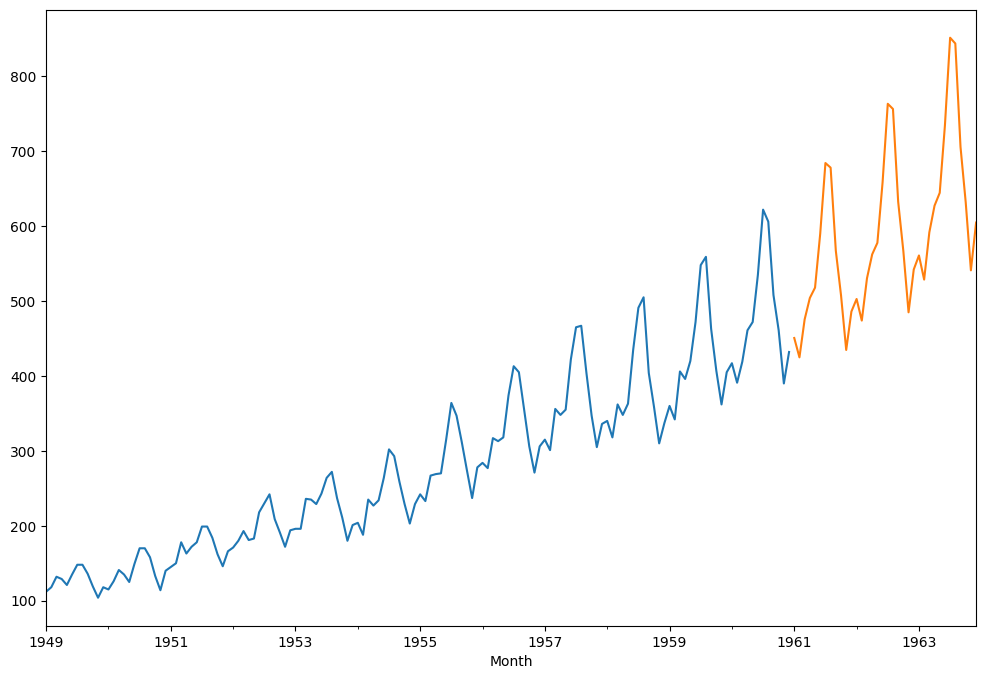

In [20]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_preds.plot()

Stationary and Differencing

A time series data set is said to be **stationary** if it does not exhibit trends or seasonality, that is fluctuations in the data are entirely due to outside forces and noise.



In [22]:
df2 = pd.read_csv('Data/samples.csv',
                  index_col=0,
                  parse_dates=True)
df2.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

<Axes: >

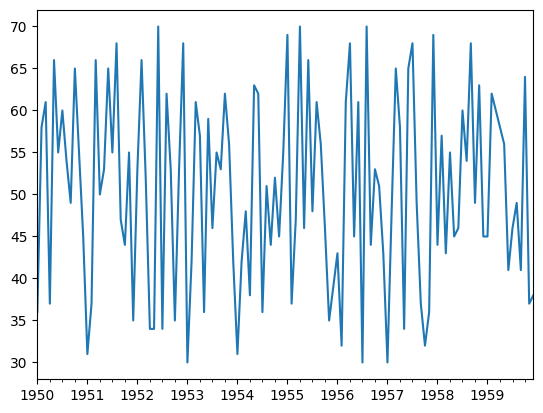

In [23]:
# Stationary - stationary data does not exhibit trends or seasonality.
# if we do not have any seasonality or any growth trends or declining trends, 
#   that means we have stationary data.
df2['a'].plot()

<Axes: >

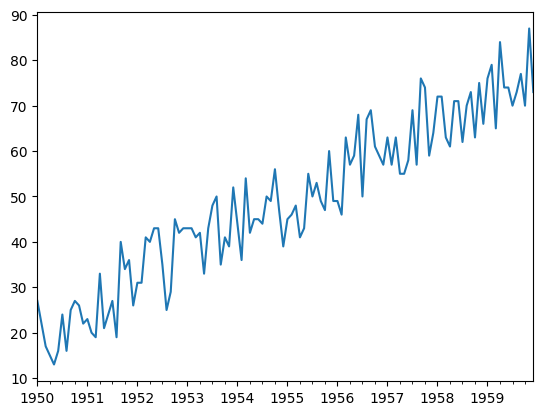

In [24]:
# Non-stationary - data shows either a trend or seasonality or both.
df2['b'].plot()

Interesting that non stationary data such as this data set above that really has
a trend, it can be made to look stationary through what's known as **differencing**

All it does is it calculates the difference between consecutive points..

In [25]:
from statsmodels.tsa.statespace.tools import diff

In [26]:
# First order difference
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [28]:
diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<Axes: >

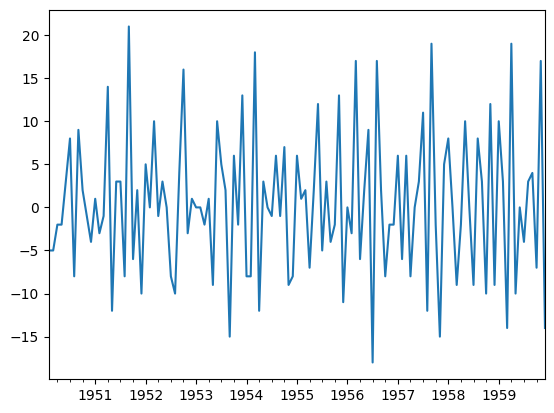

In [29]:
diff(df2['b'],k_diff=1).plot()

ACF and PACF are different functions and different methods of plotting out your time series data, which then allows us to pick parameters and components for our Arima based forecasting models.

ACF - Auto Correlation Functions

PACF - Partial Auto Correlation Functions

Corelation

Correlation, is basically just a measure of the strength of the linear relationship between two variables. 

Correlation goes between the values of negative one and one, and the closer the correlation is to positiveone, that means the stronger the positive linear relationship is.

So that means if one series goes up and you're checking the correlation of the other one
and it has a very strong, positive correlation, then if one goes up, the other goes up, which also vice versa means if one goes down, the other goes down as well.

Now, the closer the correlation is to negative one, that means the stronger the negative linear relationship is. That means if one goes up, the other goes down and vice versa.
Now, the closer the correlation is to that middle point of zero, that means the weaker the linear relationship is overall. And there's essentially no association between these two series. So there's no real relationship.

Autocorrelation

An autocorrelation plot (aka Correlogram) shows the correlation of the series with itself, lagged by x time units

So the y axis is the correlation and the x axis is the number of time units of lag.

Q. How correlated are today's sales to yesterday's saled?

We can compare the standard sales data against the sales data shifted by 1 time step. 

In [30]:
import numpy as np
import pandas as pd
%matplotlib inline

In [32]:
import statsmodels.api as sm

from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [33]:
# Non statitionary
df1 = pd.read_csv('Data/airline_passengers.csv',
                  index_col='Month',
                  parse_dates=True)
df1.index.freq = 'MS'

In [152]:
# Stationary dataset
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',
                  index_col='Date',
                  parse_dates=True)
df2.index.freq = 'D'

In [35]:
df1.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [36]:
df2.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# ACF - Auto Correlation Function plot
df = pd.DataFrame({'a':[12,5,11,12,9]})
df


a
0  12
1   5
2  11
3  12
4   9

In [39]:
acf(df['a'])

array([ 1.        , -0.44367816, -0.25517241,  0.24942529, -0.05057471])

In [41]:
# PACF - Partial Auto Correlation Function plot
# mle = maximum likelihood estimation
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.44367816, -0.56281255, -0.32294613, -0.35874796])

In [44]:
pacf_ols(df['a'],
         nlags=4)

array([ 1.        , -0.44117647, -0.44186047,  0.57535488,  0.24827586])

In [45]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

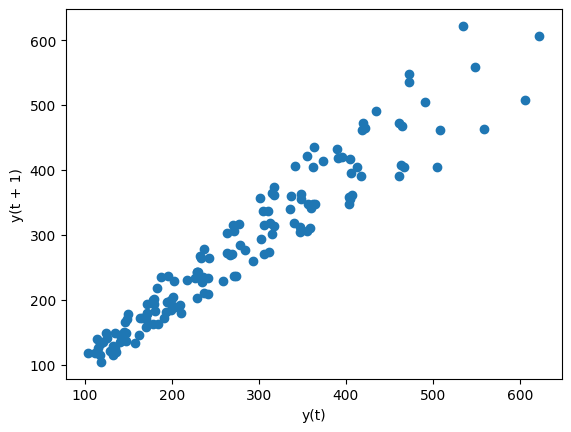

In [46]:
lag_plot(df1['Thousands of Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

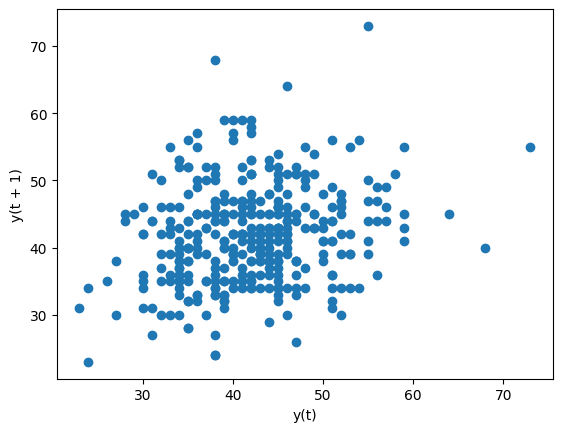

In [47]:
lag_plot(df2['Births'])

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Axes: xlabel='Month'>

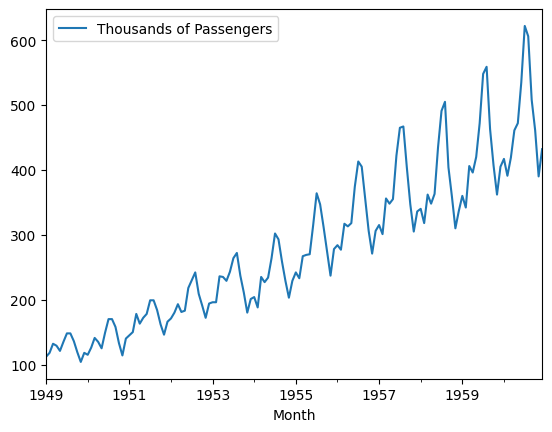

In [49]:
df1.plot()

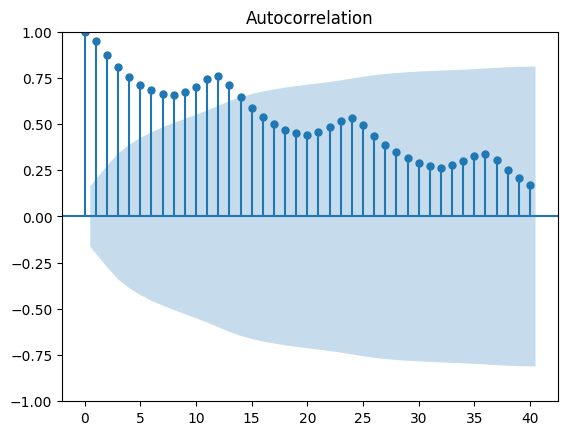

In [51]:
plot_acf(df1,lags=40);

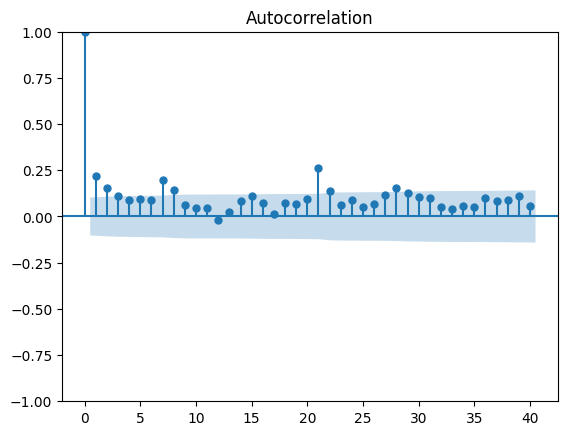

In [53]:
plot_acf(df2,lags=40);

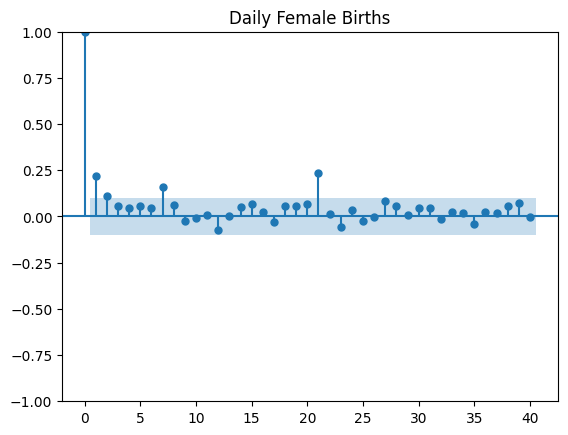

In [55]:
# Note: partial autocorrelation plots work best with data that's already stationary.
plot_pacf(df2,lags=40,title='Daily Female Births');

ARIMA overview

AutoRegressive Integrated Moving Average

Part of ARIMA model... AR I MA

AR(p): AutoRegression - A regression model that utilizes the dependent relationships betweeen
    a current observation and observations over a previous period. 

I(d): Integrated - Differencing of observations(subtracting a observation from an observation
    at the previous time step) in order to make the time series stationary.
        from statsmodels.tsa.statespace.tools import diff
        # Example: diff(df2['col'],k_diff=1).plot()

MA(q): Moving Average - A model that uses the dependency between an observation and a 
    residual error from a moving average model applied to lagged observations. 

A mathematical test we can use to test for stationarity in data is the Augmented Dickey-Fuller test

In [62]:
from platform import python_version

print(python_version())

3.7.9


In [63]:
import numpy as np
import pandas as pd
%matplotlib inline

In [64]:
# AR model
from statsmodels.tsa.ar_model import AR, ARResults


In [65]:
df = pd.read_csv('Data/uspopulation.csv',
                 index_col=0,
                 parse_dates=True)
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

In [66]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='DATE'>

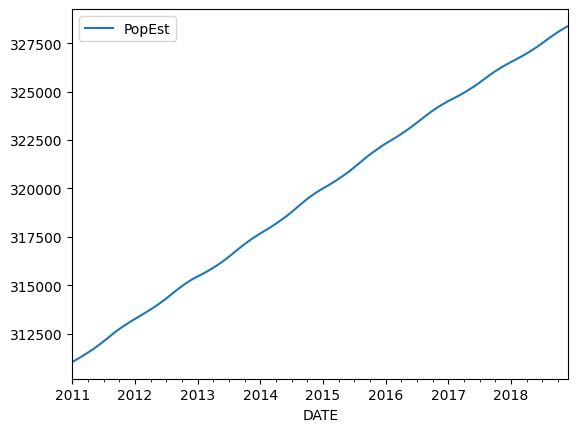

In [67]:
df.plot()

In [68]:
len(df)

96

In [69]:
96-12

84

In [70]:
train_df = df.iloc[:84]
test_df = df.iloc[84:]

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
from statsmodels.tsa.ar_model import AutoReg

In [73]:
model = AR(train_df['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        152.966704
L1.PopEst      0.999519
dtype: float64


In [74]:
# model = AR(train_df['PopEst'])
# model = AutoReg(train_df['PopEst'],lags=1).fit()

In [75]:
AR1fit.params

const        152.966704
L1.PopEst      0.999519
dtype: float64

In [76]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1

In [77]:
start

84

In [78]:
end

95

In [79]:
AR1fit.predict(start=start, end=end)

2018-01-01    326374.079074
2018-02-01    326370.160032
2018-03-01    326366.242875
2018-04-01    326362.327600
2018-05-01    326358.414208
2018-06-01    326354.502696
2018-07-01    326350.593065
2018-08-01    326346.685313
2018-09-01    326342.779440
2018-10-01    326338.875444
2018-11-01    326334.973325
2018-12-01    326331.073081
Freq: MS, dtype: float64

In [80]:
test_df

PopEst
DATE              
2018-01-01  326527
2018-02-01  326669
2018-03-01  326812
2018-04-01  326968
2018-05-01  327134
2018-06-01  327312
2018-07-01  327502
2018-08-01  327698
2018-09-01  327893
2018-10-01  328077
2018-11-01  328241
2018-12-01  328393

In [81]:
preds1 = AR1fit.predict(start=start, end=end)

In [82]:
preds1

2018-01-01    326374.079074
2018-02-01    326370.160032
2018-03-01    326366.242875
2018-04-01    326362.327600
2018-05-01    326358.414208
2018-06-01    326354.502696
2018-07-01    326350.593065
2018-08-01    326346.685313
2018-09-01    326342.779440
2018-10-01    326338.875444
2018-11-01    326334.973325
2018-12-01    326331.073081
Freq: MS, dtype: float64

In [83]:
preds1= preds1.rename('AR(1) Predictions')

In [84]:
preds1

2018-01-01    326374.079074
2018-02-01    326370.160032
2018-03-01    326366.242875
2018-04-01    326362.327600
2018-05-01    326358.414208
2018-06-01    326354.502696
2018-07-01    326350.593065
2018-08-01    326346.685313
2018-09-01    326342.779440
2018-10-01    326338.875444
2018-11-01    326334.973325
2018-12-01    326331.073081
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

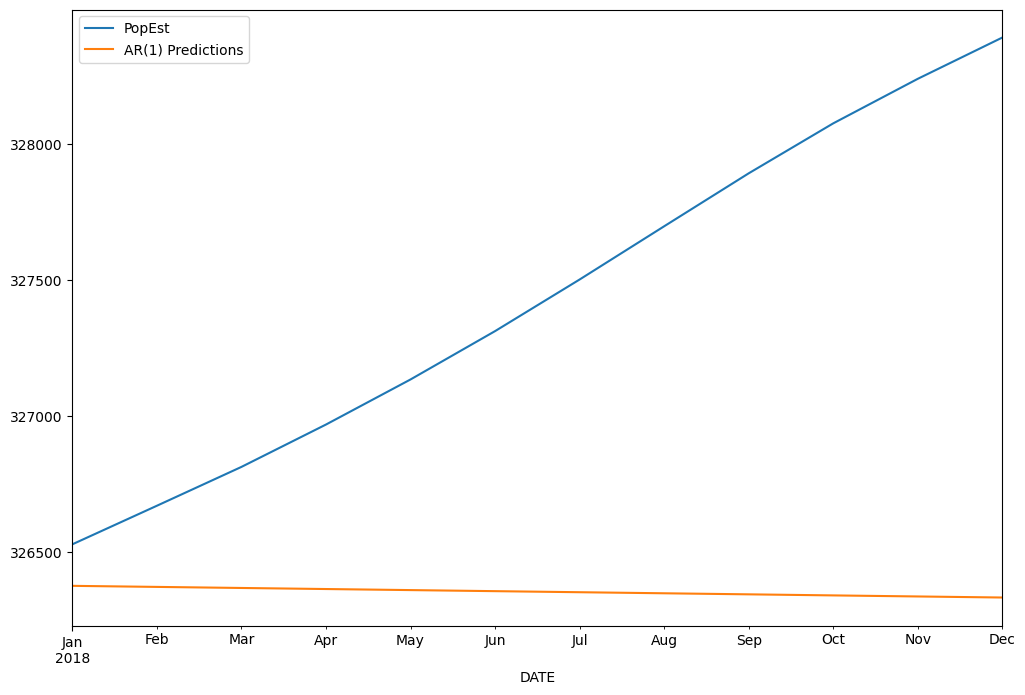

In [85]:
test_df.plot(figsize=(12,8),legend=True)
preds1.plot(legend=True)

In [87]:
# AR2 = AutoReg(train_df['PopEst'],lags=2).fit()
# Recall that our model was already created above based on the training set
model = AR(train_df['PopEst'])
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.359479
L1.PopEst      1.996475
L2.PopEst     -0.996906
dtype: float64


In [88]:
AR2fit.params

const        137.359479
L1.PopEst      1.996475
L2.PopEst     -0.996906
dtype: float64

In [ ]:
start=len(train_df)
end=len(train_df)+len(test_df)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

In [89]:
preds2 = AR2fit.predict(start,end)
preds2

2018-01-01    326530.272371
2018-02-01    326678.763050
2018-03-01    326823.419766
2018-04-01    326964.192066
2018-05-01    327101.031323
2018-06-01    327233.890758
2018-07-01    327362.725449
2018-08-01    327487.492348
2018-09-01    327608.150291
2018-10-01    327724.660014
2018-11-01    327836.984159
2018-12-01    327945.087289
Freq: MS, dtype: float64

In [90]:
preds2 = preds2.rename('AR(2) Predictions')

<AxesSubplot:xlabel='DATE'>

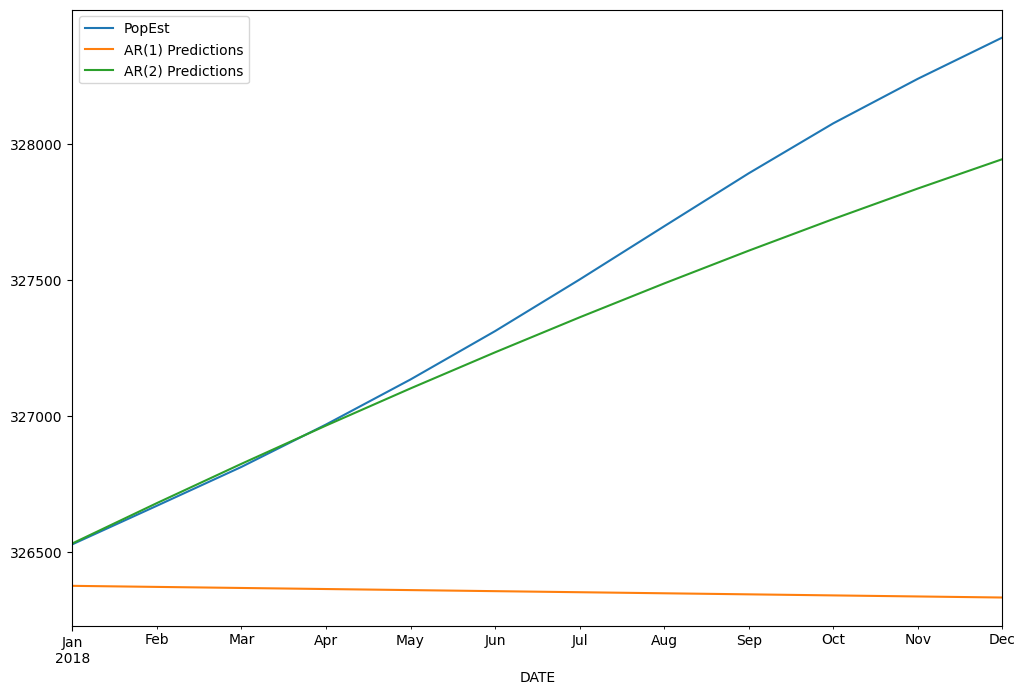

In [91]:
test_df.plot(figsize=(12,8),legend=True)
preds1.plot(legend=True)
preds2.plot(legend=True)

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [96]:
model = AR(train_df['PopEst'])
ARfit123 = model.fit(ic='t-stat')
ARfit123.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [99]:
preds8 = ARfit123.predict(start,end)
preds8 = preds8.rename('AR(8) Predictions')

In [97]:
from sklearn.metrics import mean_squared_error

In [103]:
labels = ['AR1','AR2','AR8']

In [104]:
preds = [preds1,preds2,preds8]

In [105]:
for i in range(3):
    error = mean_squared_error(test_df['PopEst'],preds[i])
    print(f'{labels[i]} error MSE was: {error}')

AR1 error MSE was: 1554757.7824218336
AR2 error MSE was: 53357.26795005651
AR8 error MSE was: 186.9746297832625


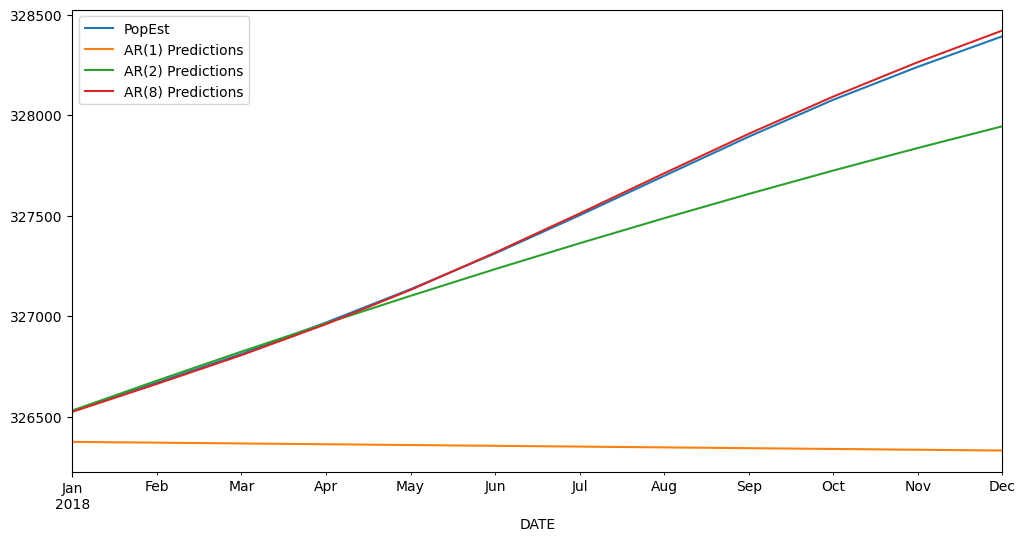

In [106]:
test_df['PopEst'].plot(legend=True)
preds1.plot(legend=True)
preds2.plot(legend=True)
preds8.plot(legend=True,figsize=(12,6));

In [108]:
# Forecasting into the Future
model = AR(df['PopEst'])

ARfit = model.fit()

# predicting 12 months in this case
forecasted_values = ARfit.predict(start=len(df),
                                  end=len(df)+12).rename('Forecast')

<AxesSubplot:xlabel='DATE'>

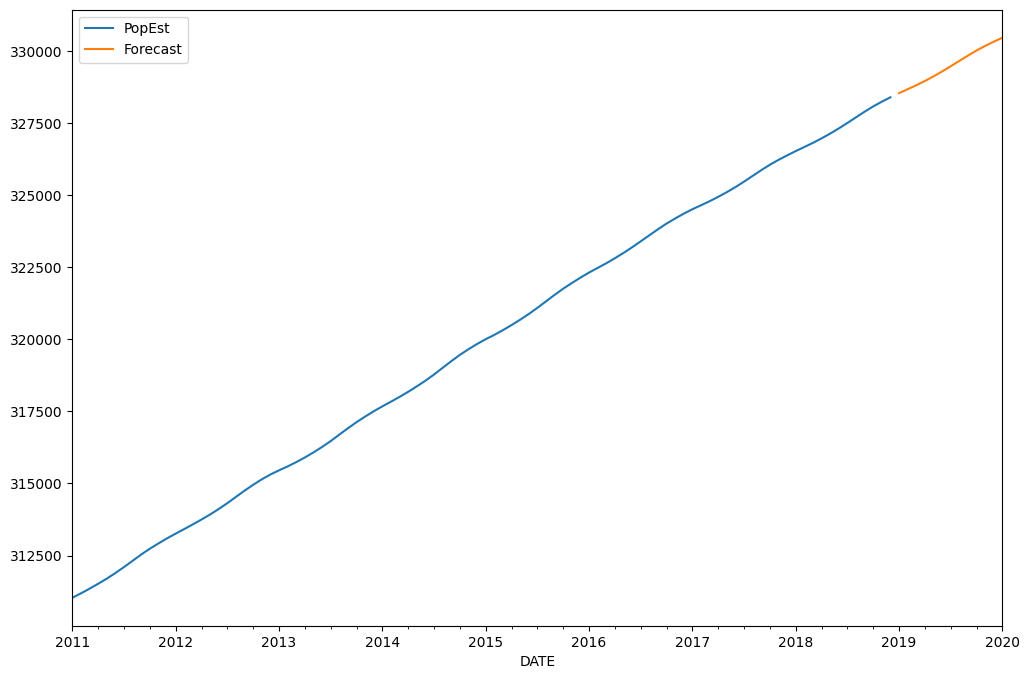

In [109]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)

In [110]:
# Forecasting into the Future
model = AR(df['PopEst'])

ARfit = model.fit()

# predicting 12 months in this case
forecasted_values = ARfit.predict(start=len(df),
                                  end=len(df)+24).rename('Forecast')

<AxesSubplot:xlabel='DATE'>

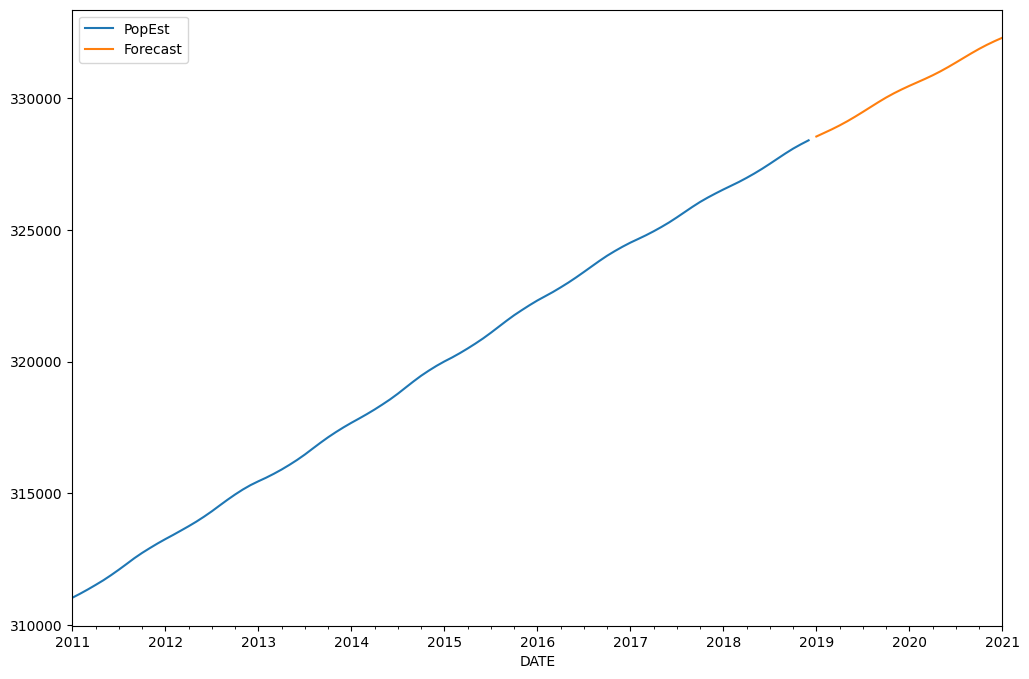

In [111]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)

Descriptive Statistics and Tests

Test for Stationarity
    To determine whether a series is stationary we can use the Augumented Dickey-Fuller test.
    This performs a test in the form of a classic null hypothesis test and returns a p-value. 

Granger Casusality Tests
    The Granger casuality test is a hypothesis test to determine if one time series is useful
    in forecasting another.



In [113]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

<AxesSubplot:xlabel='Month'>

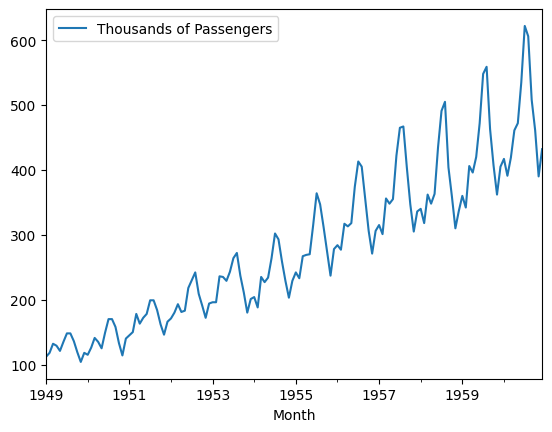

In [114]:
df1.plot()

In [115]:
from statsmodels.tsa.stattools import adfuller

In [116]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [118]:
# help(adfuller)

In [119]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistics',
                                     'p-value',
                                     '# Lags Used',
                                     '# Observations'])

In [120]:
dfout

ADF Test Statistics      0.815369
p-value                  0.991880
# Lags Used             13.000000
# Observations         130.000000
dtype: float64

In [121]:
dftest[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [122]:
for key,val in dftest[4].items():
    dfout[f'Critical Value ({key})'] = val

In [123]:
dfout

ADF Test Statistics       0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64

### Function for running the augmented Dickey-Fuller test
Since we'll use it frequently in the upcoming forecasts, let's define a function we can copy into future notebooks for running the augmented Dickey-Fuller test. Remember that we'll still have to import <tt>adfuller</tt> at the top of our notebook.

In [124]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [125]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<AxesSubplot:xlabel='Month'>

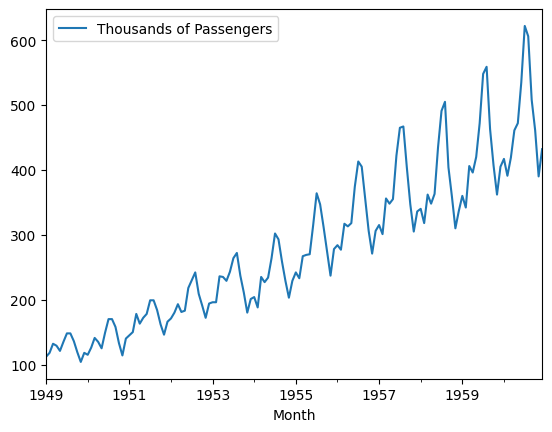

In [126]:
df1.plot()

<AxesSubplot:xlabel='Date'>

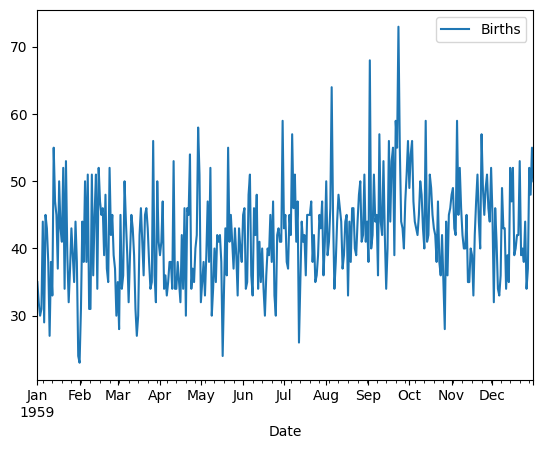

In [127]:
df2.plot()

In [128]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [129]:
df3 = pd.read_csv('Data/samples.csv',
                  index_col=0,
                  parse_dates=True)
df3.index.freq ='MS'

In [130]:
df3.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

<AxesSubplot:>

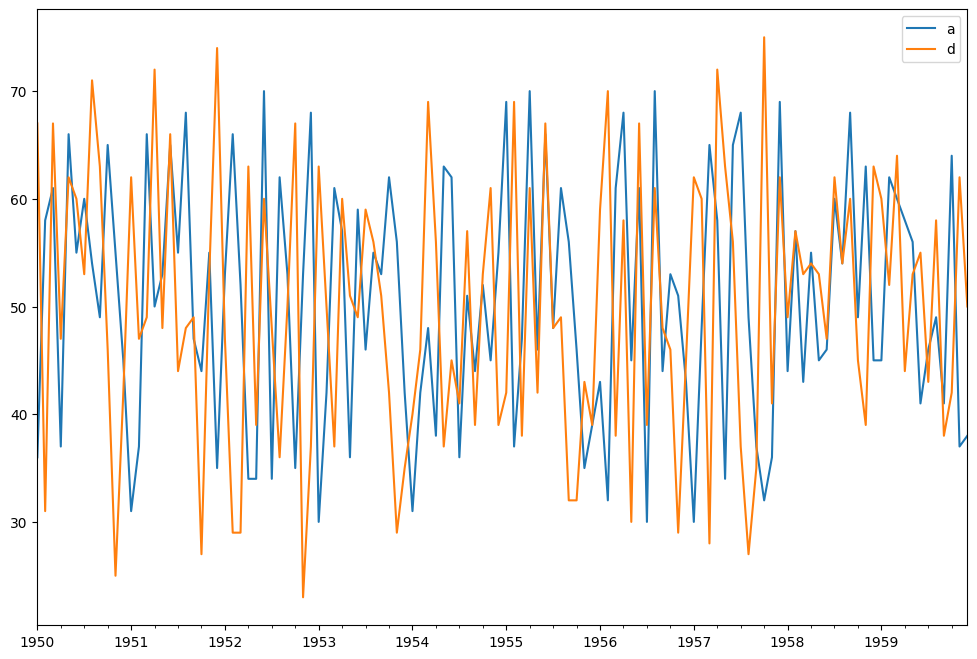

In [131]:
df3[['a','d']].plot(figsize=(12,8))

<AxesSubplot:>

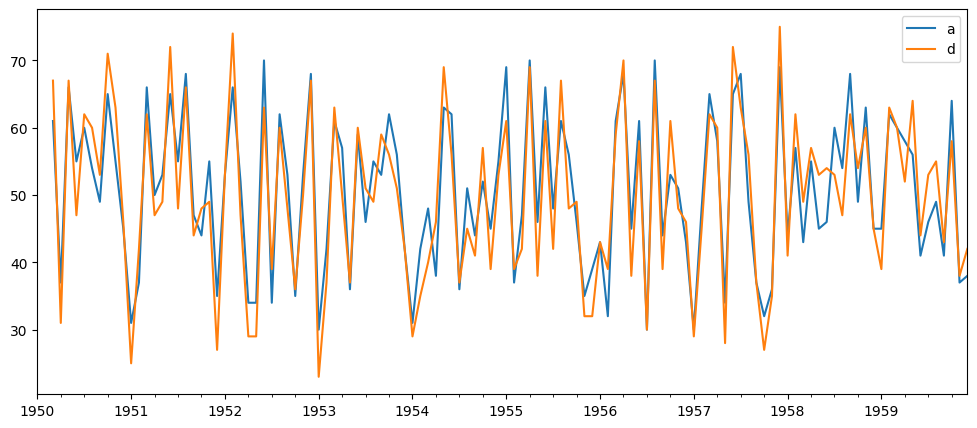

In [133]:
df3['a'].iloc[2:].plot(figsize=(12,5),legend=True)
df3['d'].shift(2).plot(legend=True)

In [134]:
from statsmodels.tsa.stattools import grangercausalitytests

In [136]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [137]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


# Evaluating forecast accuracy
Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

The formula for the mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

The formula for the root mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

The advantage of the RMSE is that it is expressed in the same units as the data.<br><br>

A method similar to the RMSE is the <a href='https://en.wikipedia.org/wiki/Mean_absolute_error'><strong>mean absolute error</strong></a> (MAE) which is the mean of the magnitudes of the error, given as<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;$MAE = {\frac 1 L} \sum\limits_{l=1}^L \mid{y_{T+l}} - \hat y_{T+l}\mid$<br><br>

A forecast method that minimizes the MAE will lead to forecasts of the median, while minimizing the RMSE will lead to forecasts of the mean.

In [138]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20,30,(50,2)),
                  columns=['test','predictions'])

In [139]:
df.head()

test  predictions
0    26           23
1    27           24
2    26           29
3    22           26
4    27           24

<AxesSubplot:>

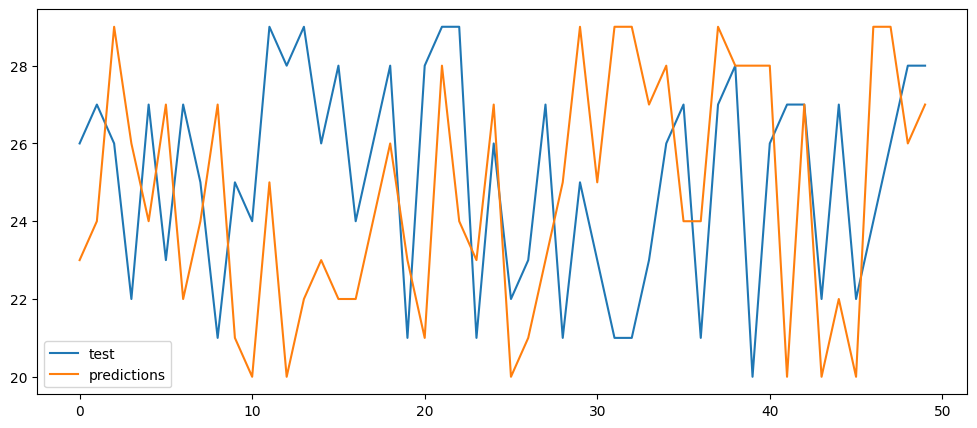

In [140]:
df.plot(figsize=(12,5))

In [141]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [143]:
rmse(df['test'],df['predictions'])

4.125530268947253

In [142]:
mse(df['test'],df['predictions'])

17.02

In [144]:
meanabs(df['test'],df['predictions'])

3.54

## Exposing Seasonality with Month and Quarter Plots
Statsmodels has two plotting functions that group data by month and by quarter. Note that if the data appears as months, you should employ <em>resampling</em> with an aggregate function before running a quarter plot. These plots return a <tt>matplotlib.Figure</tt> object.
<div class="alert alert-info"><h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html'>tsaplots.month_plot</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;&nbsp;Seasonal plot of monthly data<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html'>tsaplots.quarter_plot</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Seasonal plot of quarterly data</tt>
</div>

In [145]:
df = pd.read_csv('Data/airline_passengers.csv',
                 index_col='Month',
                 parse_dates=True)
df.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

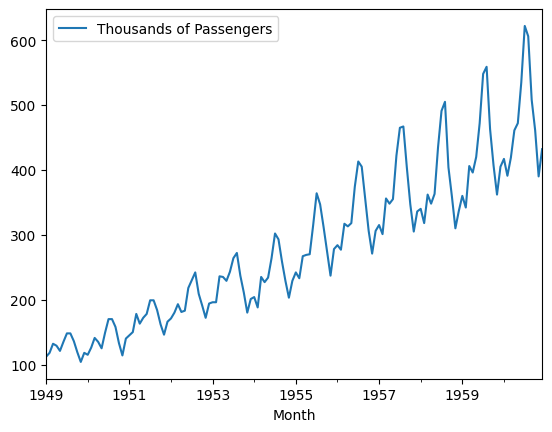

In [146]:
df.plot()

In [147]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

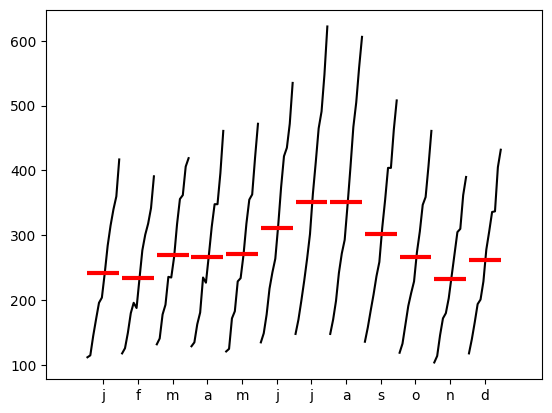

In [148]:
month_plot(df['Thousands of Passengers']);

In [149]:
# resample to quarter
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

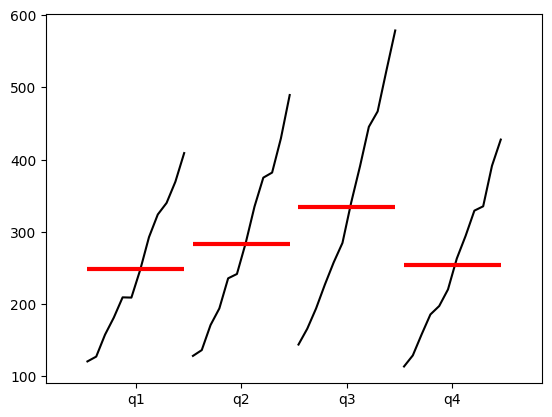

In [150]:
quarter_plot(dfq);

ARIMA Theory Overview

Reading plots

If the autocorrelation plot shows +ve autocorrelation at the first lag(lag-1), then it suggests to use the AR terms in relation to the lag

On the other hand, If the autocorrelation plot shows -ve autocorrelation at the first lag(lag-1), then it suggests to use the AA terms in relation to the lag

This will allow to decide what actual values of p,d, and q to provide your ARIMA model.
p: the number of lag observations included in the model.
d: The number of times that the raw observations are differenced
q: The size of the moving average window, also called the order of moving average

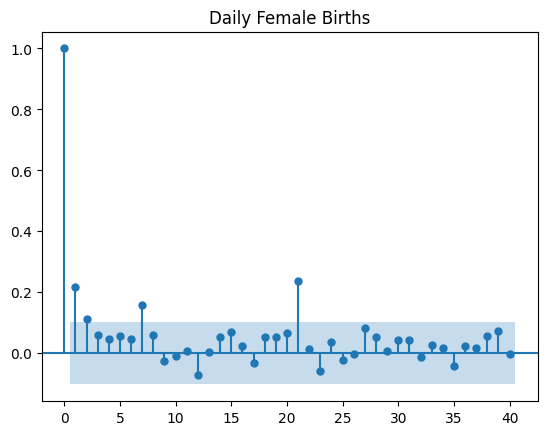

In [156]:
# Note: partial autocorrelation plots work best with data that's already stationary.
plot_pacf(df2,lags=40,title='Daily Female Births');

In the plot above,
    Typically a sharp drop after lag 'k' suggests an AR-k model should be used

    If there is a gradual decline, it suggests an MA model.

Identitfication of an *AR model* is often best done with PACF

Identitfication of an *MA model* is often best done with ACF rather than the PACF

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset
df1 = pd.read_csv('Data/airline_passengers.csv',
                  index_col='Month',
                  parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

## pmdarima Auto-ARIMA
This is a third-party tool separate from statsmodels. It should already be installed if you're using our virtual environment. If not, then at a terminal run:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<tt>pip install pmdarima</tt>

In [2]:
# pip install pmdarima

In [3]:
from pmdarima import auto_arima

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#help(auto_arima)

In [9]:
stepwise_fit = auto_arima(df2['Births'],
           start_p=0,
           start_q=0,
           max_p=6,
           max_q=3,
           seasonal=False,
           trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.998, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [13]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sun, 12 Mar 2023   AIC                           2459.074
Time:                        10:54:29   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (Q):                       37.21   Jarque-Bera (JB):                25.33
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
stepwise_fit= auto_arima(df1['Thousands of Passengers'],
                         start_p=0,
                         start_q=0,
                         max_p=4,
                         max_q=4,
                         seasonal=True,
                         trace=True,
                         m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.41 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.79 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [16]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sun, 12 Mar 2023   AIC                           1019.178
Time:                                     11:39:42   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 ARMA and ARIMA - AutoRegressive Integrated Moving Average

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [21]:
from pmdarima import auto_arima

In [22]:
df1 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',
                  index_col='Date',
                  parse_dates=True)
df1.index.freq = 'D'

#grab first four months of data
df1 = df1[:120]

In [23]:
df2 = pd.read_csv('Data/TradeInventories.csv',
                  index_col='Date',
                  parse_dates=True)
df2.index.freq = 'MS'

# ARMA

<AxesSubplot:xlabel='Date'>

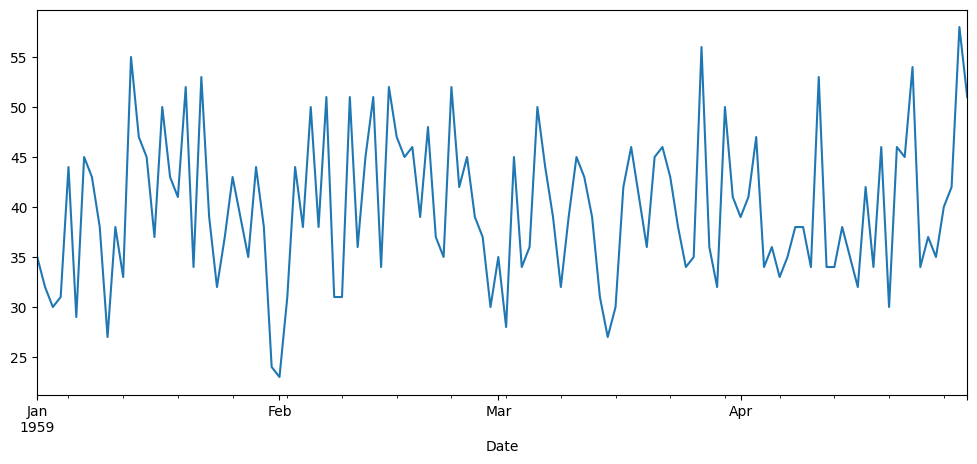

In [24]:
df1['Births'].plot(figsize=(12,5))

In [25]:
# run the augmented Dicky Fuller test to confirm stationary.
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    "Python for Time Series Data Analysis_Notes and code.ipynb"
    
    Pass in a time Series and an optional title, returns an ADF report
    """
    print(f"Augmented Dickey-Fuller Test: {'title'}")
    result = adfuller(series.dropna(),autolag='AIC')    # .dropna() handles differenced data

    labels = ['ADF Test Statistics','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())  # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print("Reject the null hypothesis")
        print("Data has no unit root is stationary")
    else:
        print('Weak evidence against the null hypothesis')
        print("Fail to reject the null hypothesis")
        print("Data has a unit root is non-stationary")

In [26]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: title
ADF Test Statistics    -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root is stationary


In [29]:
auto_arima(df1['Births'],
           seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 12 Mar 2023   AIC                            823.489
Time:                        12:01:39   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# General rule: is you should set the length of your test set equal to your intended forecast size.

# Train - test split
train_df = df1.iloc[:90]
test_df = df1.iloc[90:]

In [30]:
arma_model = ARMA(train_df['Births'],
     order=(2,2))

In [31]:
results_arma = arma_model.fit()

In [32]:
results_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sun, 12 Mar 2023   AIC                            627.809
Time:                        12:03:00   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.499      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
# Start and end dates
start = len(train_df)
end = len(train_df) +  len(test_df) - 1

In [39]:
print(start, end)

90 119


In [34]:
predictions_arma = results_arma.predict(start,end).rename('ARMA (2,2) Predictions')

In [35]:
predictions_arma.head()

1959-04-01    39.982226
1959-04-02    39.992615
1959-04-03    39.809832
1959-04-04    39.848175
1959-04-05    39.761539
Freq: D, Name: ARMA (2,2) Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

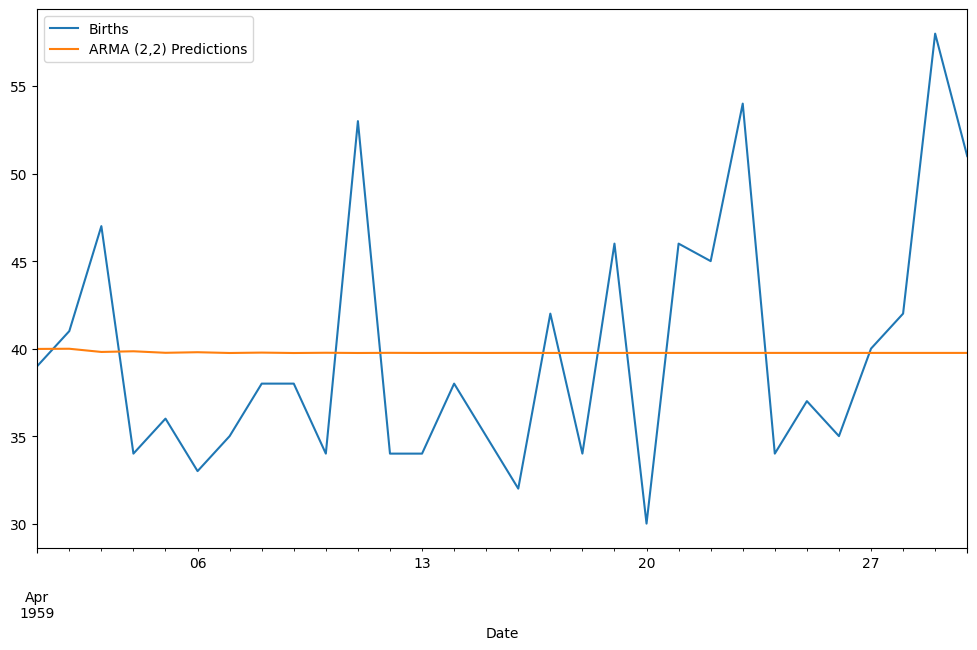

In [36]:
test_df['Births'].plot(figsize=(12,7),legend=True)
predictions_arma.plot(legend=True)

In [37]:
test_df.mean()

Births    39.833333
dtype: float64

In [38]:
predictions_arma.mean()

39.77743413337366

#  ARIMA - AutoRegressive Integrated Moving Average

<AxesSubplot:xlabel='Date'>

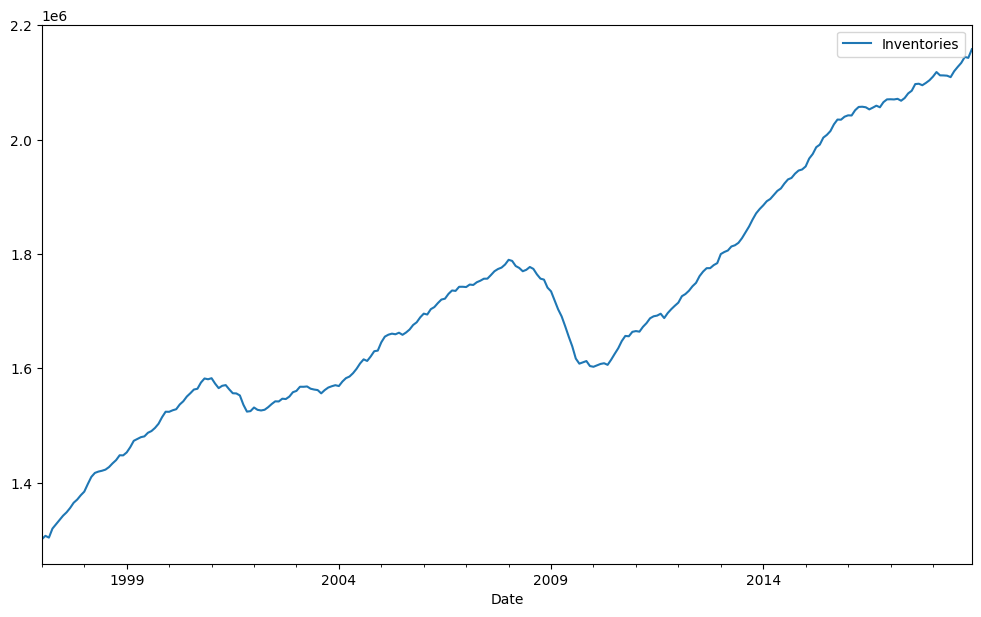

In [40]:
df2.plot(figsize=(12,7))

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

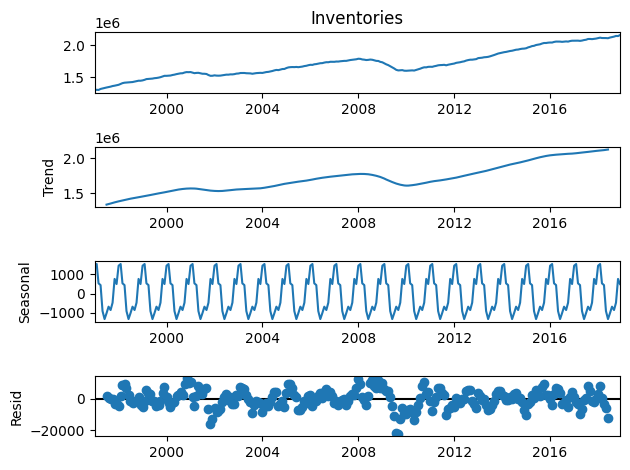

In [43]:
result = seasonal_decompose(df2['Inventories'],
                   model='add')
result.plot();

In [44]:
auto_arima(df2['Inventories'],
           seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 12 Mar 2023   AIC                           5348.037
Time:                        12:18:23   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# run the augmented Dicky Fuller test to confirm stationary.
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    "Python for Time Series Data Analysis_Notes and code.ipynb"
    
    Pass in a time Series and an optional title, returns an ADF report
    """
    print(f"Augmented Dickey-Fuller Test: {'title'}")
    result = adfuller(series.dropna(),autolag='AIC')    # .dropna() handles differenced data

    labels = ['ADF Test Statistics','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())  # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print("Reject the null hypothesis")
        print("Data has no unit root is stationary")
    else:
        print('Weak evidence against the null hypothesis')
        print("Fail to reject the null hypothesis")
        print("Data has a unit root is non-stationary")

In [46]:
from statsmodels.tsa.statespace.tools import diff

In [47]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [50]:
df2.head()

Inventories   Diff_1
Date                            
1997-01-01      1301161      NaN
1997-02-01      1307080   5919.0
1997-03-01      1303978  -3102.0
1997-04-01      1319740  15762.0
1997-05-01      1327294   7554.0

In [48]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: title
ADF Test Statistics      -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root is stationary


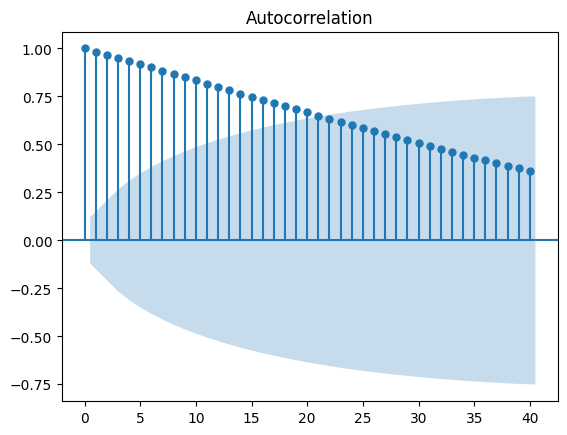

In [52]:
plot_acf(df2['Inventories'],
         lags=40);

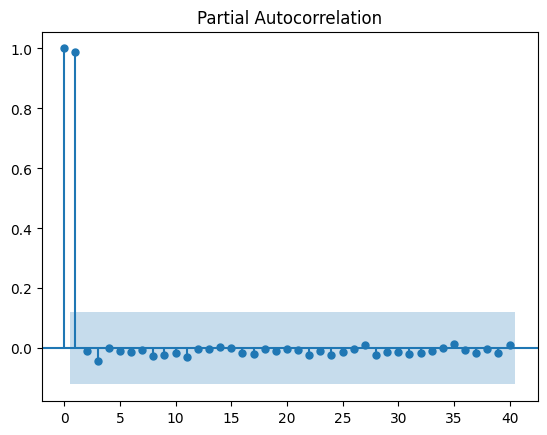

In [53]:
plot_pacf(df2['Inventories'],
          lags=40);

In [ ]:
# AR = 1
# I = 1
# MA = 0 or 1 # Less error

In [55]:
stepwise_fit = auto_arima(df2['Inventories'],
                          start_p=0,
                          start_q=0,
                          max_P=2,
                          max_q=2,
                          seasonal=False,
                          trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.908 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 12 Mar 2023   AIC                           5348.037
Time:                        12:34:49   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
df2.head()

Inventories   Diff_1
Date                            
1997-01-01      1301161      NaN
1997-02-01      1307080   5919.0
1997-03-01      1303978  -3102.0
1997-04-01      1319740  15762.0
1997-05-01      1327294   7554.0

In [56]:
len(df2)

264

In [58]:
train_data = df2.iloc[:252]
test_data = df2.iloc[252:]

In [60]:
arima_model = ARIMA(train_data['Inventories'],
                    order=(1,1,1))
results = arima_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Sun, 12 Mar 2023   AIC                           4980.790
Time:                        12:38:46   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.869      2.378      0.017     561.674    5833.465
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
start = len(train_data) #start at very end of training data
end = len(train_data) + len(test_data) -  1

In [62]:
predictions_arima = results.predict(start=start,
                                    end=end,
                                    typ='levels').rename('ARIMA(1,1,1) Predictions')

In [65]:
predictions_arima.head()

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113887e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

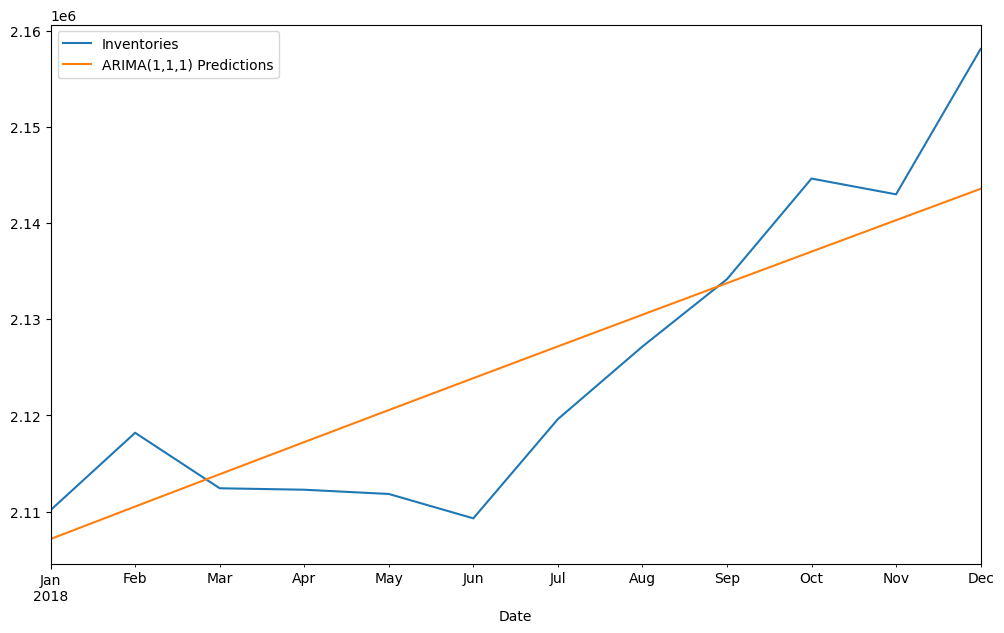

In [66]:
test_data['Inventories'].plot(figsize=(12,7),legend=True)
predictions_arima.plot(legend=True)

In [67]:
# Evaluating model
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data['Inventories'],predictions_arima)
error

7789.5973836593785

In [68]:
test_data['Inventories'].mean()

2125075.6666666665

In [69]:
predictions_arima.mean()

2125465.272049339

# Forecast into the unknown future

In [70]:
model_arima = ARIMA(df2['Inventories'],
                    order=(1,1,1))
results = model_arima.fit()

In [71]:
fcast = results.predict(start=len(df2),
                        end=len(df2)+11,
                        typ='levels').rename('ARIMA (1,1,1) Forecast')

<AxesSubplot:xlabel='Date'>

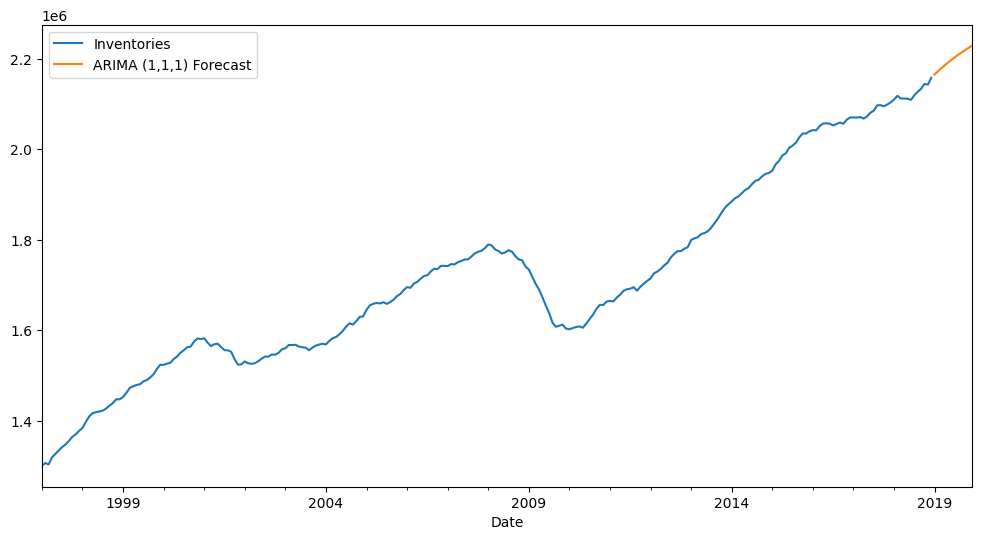

In [72]:
df2['Inventories'].plot(legend=True, figsize=(12,6))
fcast.plot(legend=True)

# SARIMA - Seasonal Autoregressive Integrated Moving Average

classic ARIMA accepts the parameters, (p,qd), SARIMA or seasonal,ARIMA accepts an
additional set parameters (P,D,Q)m that specifically described the seasonal
components of the model.

So here these (P,D,Q) terms represent the seasonal regression differences and moving average coefficients, and m represents the number of data points (rows) in each seasonal cycle.

In [73]:
import pandas as pd
import numpy as np
%matplotlib inline

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
from pmdarima import auto_arima

In [78]:
df = pd.read_csv('Data/co2_mm_mlo.csv')
df.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

In [79]:
# dict(year=df['year'],month=df['month'],day=1) # OR
df['date'] = pd.to_datetime(
    {
    'year':df['year'],
    'month':df['month'],
    'day':1
    })
df.head()

year  month  decimal_date  average  interpolated       date
0  1958      3      1958.208   315.71        315.71 1958-03-01
1  1958      4      1958.292   317.45        317.45 1958-04-01
2  1958      5      1958.375   317.50        317.50 1958-05-01
3  1958      6      1958.458      NaN        317.10 1958-06-01
4  1958      7      1958.542   315.86        315.86 1958-07-01

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [81]:
df = df.set_index('date')

In [82]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

In [83]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='date'>

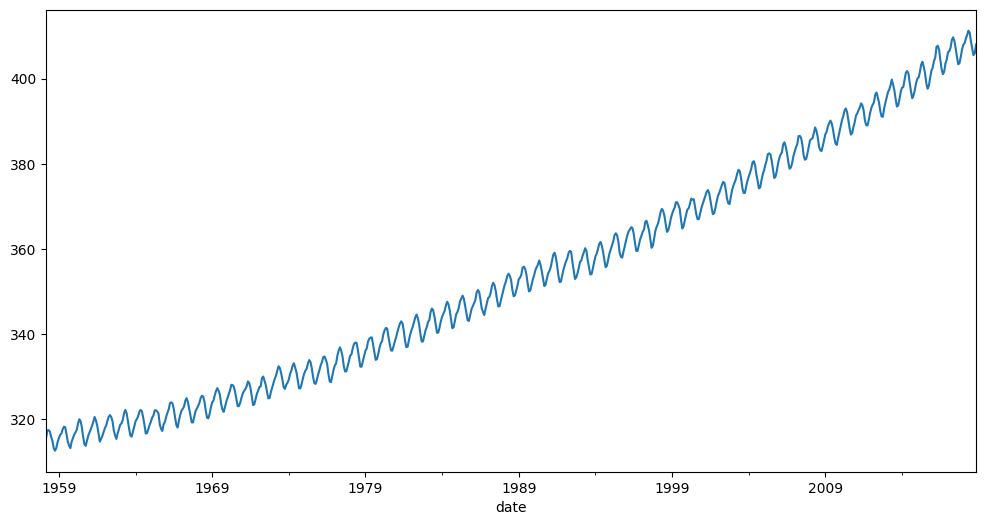

In [84]:
df['interpolated'].plot(figsize=(12,6))

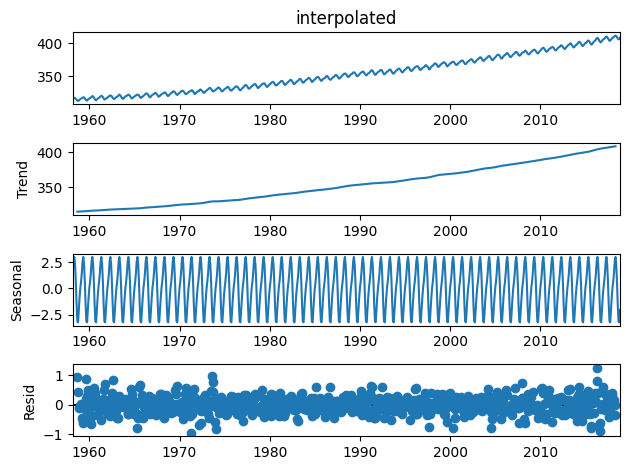

In [86]:
# to confirm that there are some seasonality, we can run a decomposition
result = seasonal_decompose(df['interpolated'],
                            model='add')
result.plot();

<AxesSubplot:xlabel='date'>

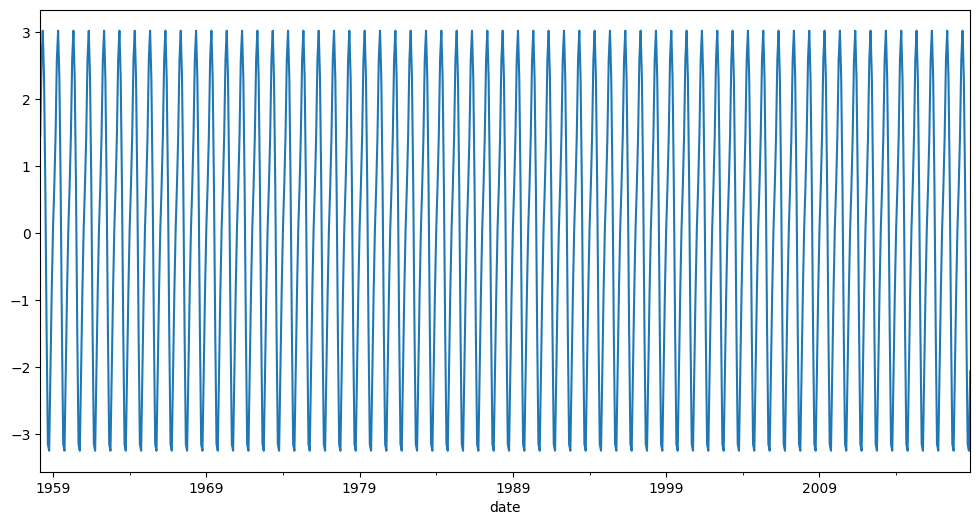

In [88]:
result.seasonal.plot(figsize=(12,6))

In [89]:
auto_arima(df['interpolated'],
           seasonal=True,
           m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Sun, 12 Mar 2023   AIC                            424.504
Time:                                    13:22:21   BIC                            452.046
Sample:                                03-01-1958   HQIC                           435.132
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3519      0.086      4.112      0.000       0.184       0.520
ar.L2          0.0875      0.055      1.599      0.110      -0.020       0.195
ma.L1         -0.7077      0.085     -8.325      0.000      -0.874      -0.541
ar.S.L12       0.9996      0.000   2963.343      0.000       0.999       1.000
ma.S.L12      -0.8667      0.021    -40.631      0.000      -0.908      -0.825
sigma2         0.0957      0.005     20.416      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.49
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
len(df)

729

In [91]:
train_data = df.iloc[:717]
test_data = df.iloc[717:]

In [92]:
sarima_model = SARIMAX(train_data['interpolated'],
                       order=(0,1,1),
                       seasonal_order=(1,0,1,12))

In [93]:
sarima_model1 = SARIMAX(train_data['interpolated'],
                       order=(2,1,1),
                       seasonal_order=(1,0,1,12))

In [95]:
result_sarima = sarima_model.fit()
result_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.149
Date:                            Sun, 12 Mar 2023   AIC                            418.298
Time:                                    13:35:53   BIC                            436.593
Sample:                                03-01-1958   HQIC                           425.363
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3710      0.034    -10.788      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3135.544      0.000       0.999       1.000
ma.S.L12      -0.8642      0.023    -37.547      0.000      -0.909      -0.819
sigma2         0.0960      0.005     20.233      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.91   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:

result_sarima1 = sarima_model1.fit()
result_sarima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.881
Date:                            Sun, 12 Mar 2023   AIC                            415.763
Time:                                    13:36:00   BIC                            443.205
Sample:                                03-01-1958   HQIC                           426.360
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3480      0.061      5.673      0.000       0.228       0.468
ar.L2          0.0837      0.034      2.431      0.015       0.016       0.151
ma.L1         -0.7021      0.054    -12.919      0.000      -0.809      -0.596
ar.S.L12       0.9996      0.000   2730.842      0.000       0.999       1.000
ma.S.L12      -0.8659      0.023    -37.907      0.000      -0.911      -0.821
sigma2         0.0954      0.005     20.316      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       44.31   Jarque-Bera (JB):                 4.69
Prob(Q):                              0.29   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [98]:
predictions_sarima = result_sarima.predict(start,end,typ='levels').rename('SARIMA Predictions')

<AxesSubplot:xlabel='date'>

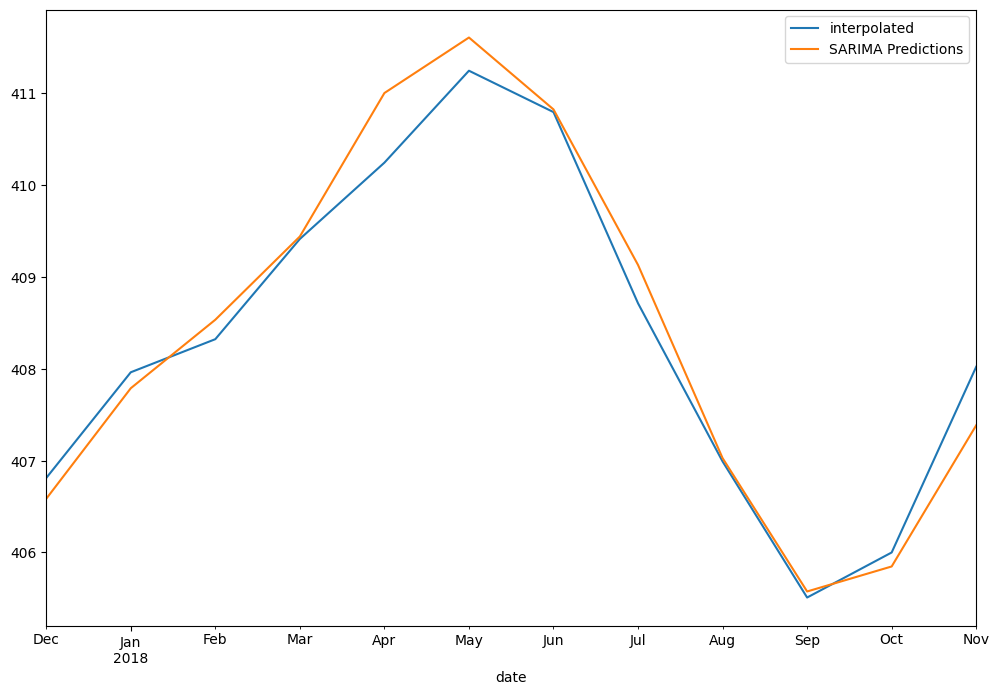

In [99]:
test_data['interpolated'].plot(legend=True, figsize=(12,8))
predictions_sarima.plot(legend=True)

In [100]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data['interpolated'],predictions_sarima)
error

0.34634436102432575

In [101]:
test_data['interpolated'].mean()

408.3333333333333

In [102]:
# retrain on full data and forecast in unknown future

model_sarima = SARIMAX(df['interpolated'],
                       order=(0,1,1),
                       seasonal_order=(1,0,1,12))
result_sarima = model_sarima.fit()

In [104]:
fcast = result_sarima.predict(start=len(df),
                      end= len(df)+11,
                      typ='levels').rename('SARIMA FORCAST')

<AxesSubplot:xlabel='date'>

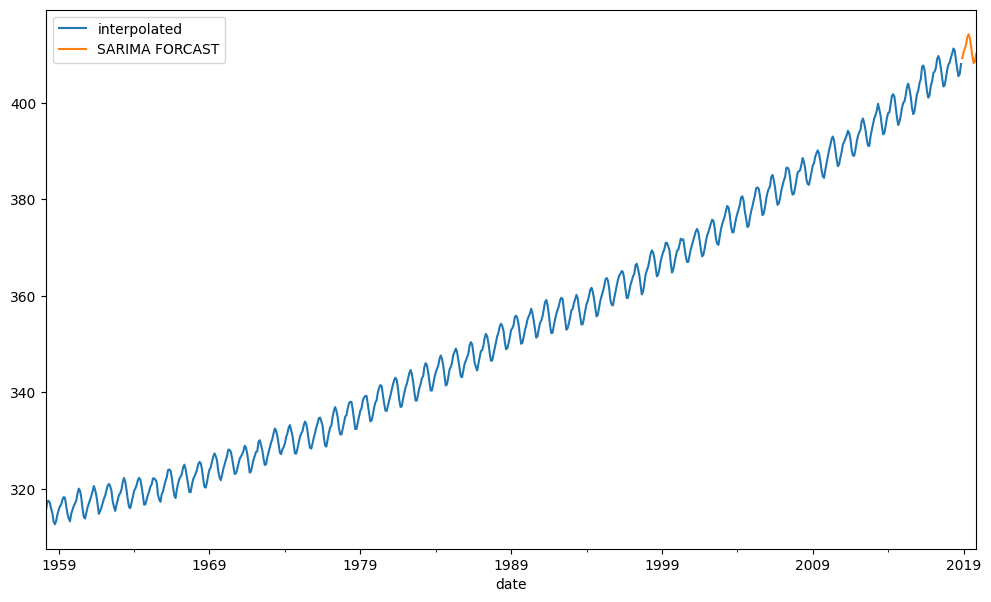

In [105]:
df['interpolated'].plot(legend=True,figsize=(12,7))
fcast.plot(legend=True)

<AxesSubplot:xlabel='date'>

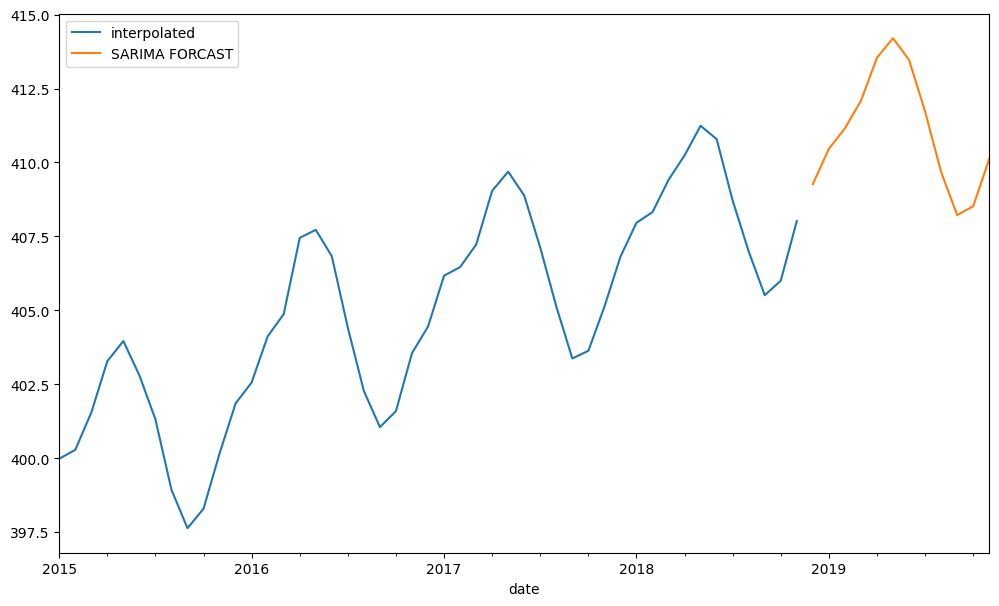

In [107]:
df['interpolated']['2015-01-01':].plot(legend=True,figsize=(12,7))
fcast.plot(legend=True)

# SARIMAX - Seasonal Autoregressive Integrated Moving Average Exogenous

Exogenous variables are outside information, not historical label data. 
    such as adding in exogenous variables such as holidays, weekday col... etc

In [140]:
# Trying to forecast the number of visitors to a restaurant and we had historical data on 
#   previous visitor numbers

import pandas as pd
import numpy as np
%matplotlib inline

In [141]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_csv('Data/RestaurantVisitors.csv',
                 index_col='date',
                 parse_dates=True)
df.index.freq='D'

In [143]:
df.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [145]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [146]:
df1 = df.dropna()
df1.tail()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-18    Tuesday        0           na   30.0   30.0   13.0   18.0   91.0
2017-04-19  Wednesday        0           na   20.0   11.0   30.0   18.0   79.0
2017-04-20   Thursday        0           na   22.0    3.0   19.0   46.0   90.0
2017-04-21     Friday        0           na   38.0   53.0   36.0   38.0  165.0
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0

In [147]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [148]:
cols = ['rest1', 'rest2', 'rest3', 'rest4']
for column in cols:
    df1[column] = df1[column].astype(int)

In [149]:
df1.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day     65     25     67    139   
2016-01-02  Saturday        0              na     24     39     43     85   
2016-01-03    Sunday        0              na     24     31     66     81   
2016-01-04    Monday        0              na     23     18     32     32   
2016-01-05   Tuesday        0              na      2     15     38     43   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    int32  
 4   rest2         478 non-null    int32  
 5   rest3         478 non-null    int32  
 6   rest4         478 non-null    int32  
 7   total         478 non-null    float64
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 26.1+ KB


<AxesSubplot:xlabel='date'>

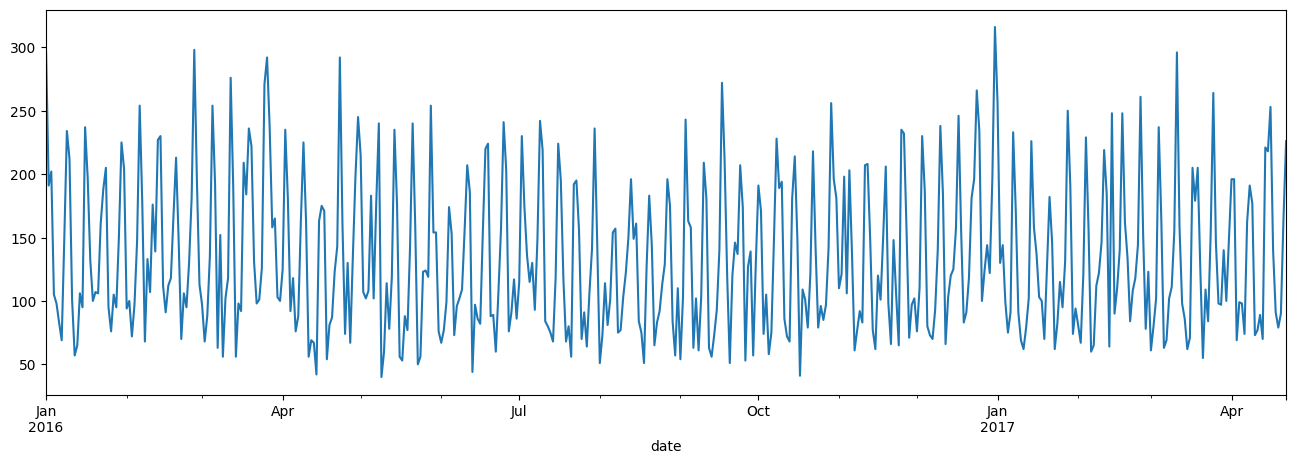

In [151]:
df1['total'].plot(figsize=(16,5))

In [152]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [153]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

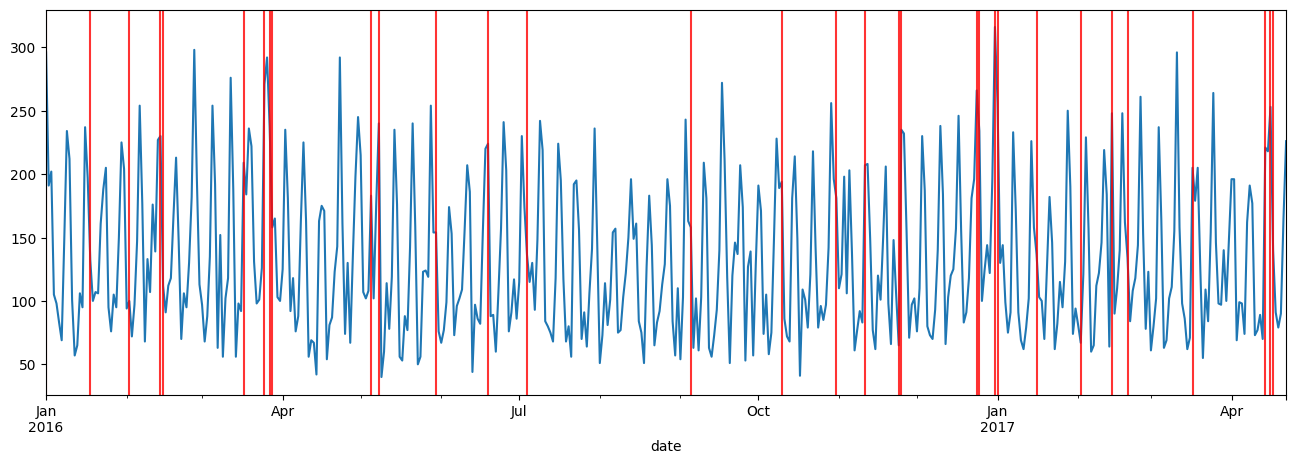

In [154]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    # Add vertical line
    ax.axvline(x=day,color='red',alpha=0.8);

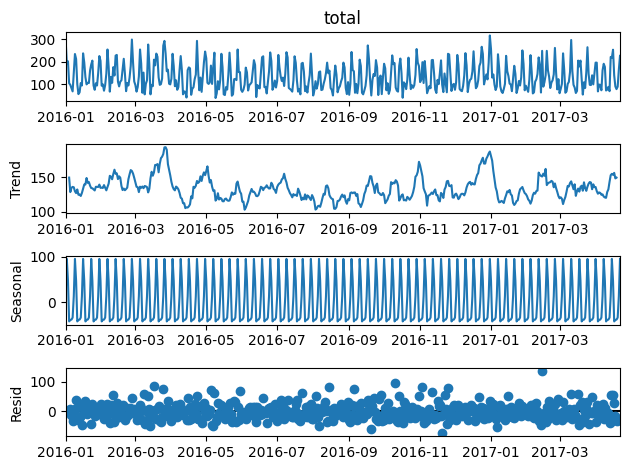

In [155]:
# ETSD composition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['total'])
result.plot();

<AxesSubplot:xlabel='date'>

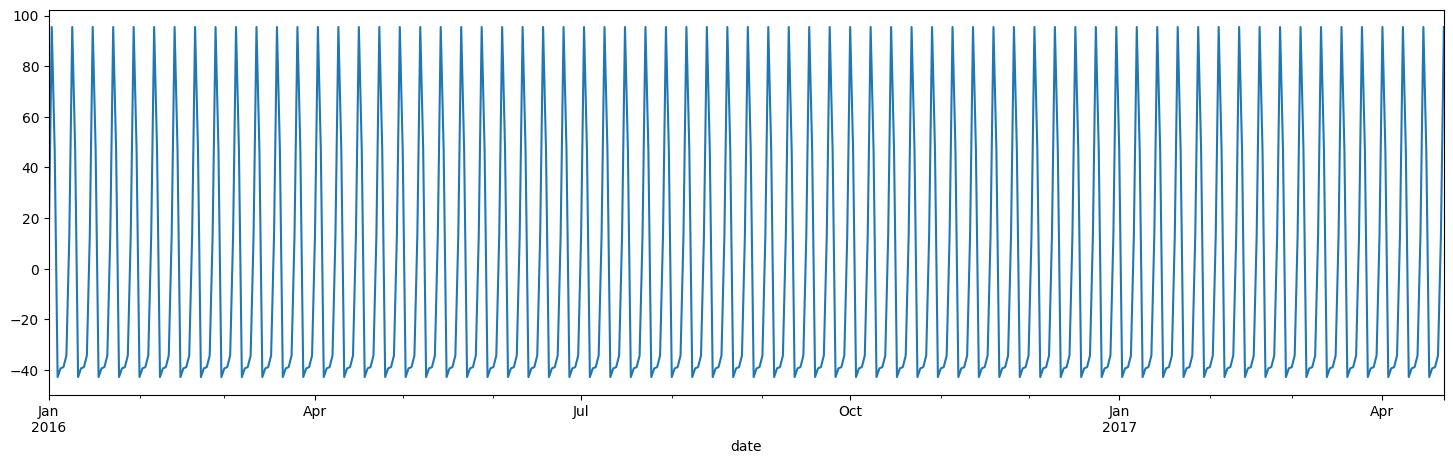

In [156]:
result.seasonal.plot(figsize=(18,5))

In [157]:
len(df1)

478

In [158]:
train_df = df1.iloc[:436]
# 4 weeks for testing... or forecasting for about a month
test_df = df1.iloc[436:]

In [159]:
from pmdarima import auto_arima

In [160]:
auto_arima(df1['total'],
           seasonal=True,
           trace=True,
           m=7).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.49 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=4921.568, Time=2.09 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4821.598, Time=1.27 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.80 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.304, Time=2.30 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.96 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4777.622, Time=0.98 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.811
Date:                   Sun, 12 Mar 2023   AIC                           4777.622
Time:                           14:29:21   BIC                           4794.300
Sample:                       01-01-2016   HQIC                          4784.179
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6147      1.855      3.027      0.002       1.979       9.251
ar.S.L7        0.9581      0.014     70.098      0.000       0.931       0.985
ma.S.L7       -0.7357      0.051    -14.490      0.000      -0.835      -0.636
sigma2      1241.0037     74.482     16.662      0.000    1095.022    1386.985
===================================================================================
Ljung-Box (Q):                       69.93   Jarque-Bera (JB):                58.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.72
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train_df['total'],
                        order=(1,0,0),
                        seasonal_order=(2,0,0,7))   # enforce_invertibility=False 

In [162]:
results_sarima = model_sarima.fit()
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 12 Mar 2023   AIC                           4457.403
Time:                                   14:29:21   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [163]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1

In [165]:
predictions_sarima = results_sarima.predict(start,end).rename('SARIMA model')

<AxesSubplot:xlabel='date'>

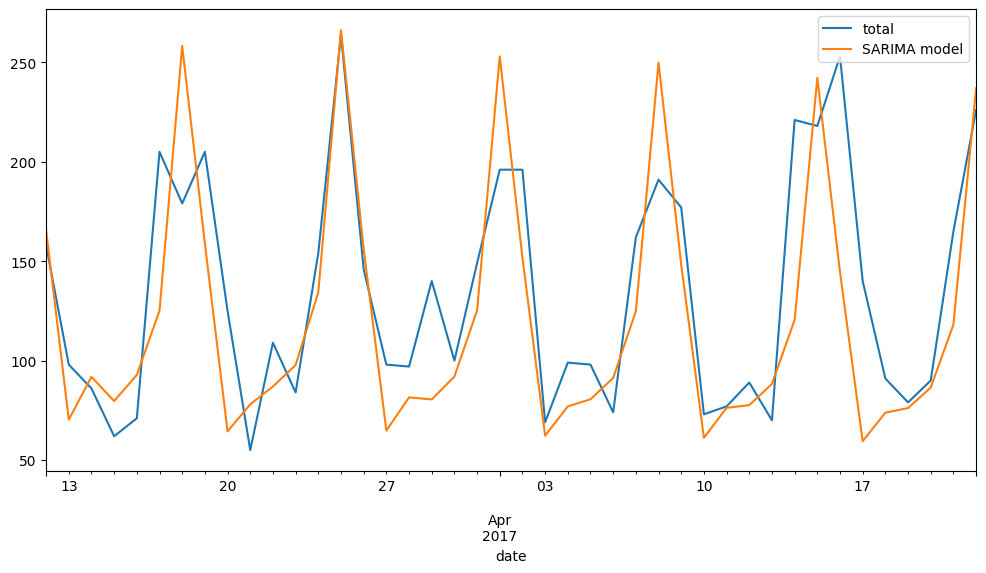

In [166]:
test_df['total'].plot(figsize=(12,6),legend=True)
predictions_sarima.plot(legend=True)

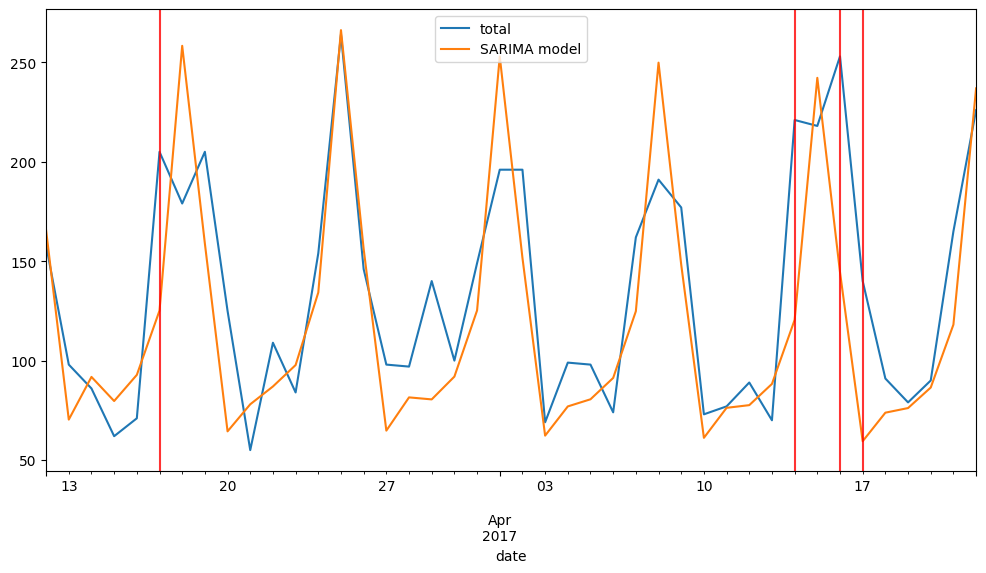

In [167]:
ax = test_df['total'].plot(figsize=(12,6),legend=True)
predictions_sarima.plot(legend=True)

for day in test_df.query('holiday==1').index:
    ax.axvline(x=day,color='red',alpha=0.8)

In [169]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_df['total'],predictions_sarima)
error

41.26315494615252

In [170]:
test_df['total'].mean()

134.26190476190476

In [171]:
df1['holiday']

date
2016-01-01    1
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
             ..
2017-04-18    0
2017-04-19    0
2017-04-20    0
2017-04-21    0
2017-04-22    0
Freq: D, Name: holiday, Length: 478, dtype: int64

In [ ]:
# whenever you're using exogenous variables of stats models, 
# keep in mind that Stats Models is expecting this to have two sets of brackets...
#    or a df

# df1[['holiday']]

In [172]:
# SARIMA with X(exogenous variable)
auto_arima(df1['total'],
           exogenous=df1[['holiday']],
           seasonal=True,
           m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.811
Date:                   Sun, 12 Mar 2023   AIC                           4777.622
Time:                           14:45:15   BIC                           4794.300
Sample:                       01-01-2016   HQIC                          4784.179
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6147      1.855      3.027      0.002       1.979       9.251
ar.S.L7        0.9581      0.014     70.098      0.000       0.931       0.985
ma.S.L7       -0.7357      0.051    -14.490      0.000      -0.835      -0.636
sigma2      1241.0037     74.482     16.662      0.000    1095.022    1386.985
===================================================================================
Ljung-Box (Q):                       69.93   Jarque-Bera (JB):                58.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.72
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
# Train our SARIMAX model
model_sarimax = SARIMAX(train_df['total'],
                        exog=train_df[['holiday']],
                        order=(1,0,1),
                        seasonal_order=(1,0,1,7),
                        enforce_invertibility=False)

In [174]:
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2131.384
Date:                           Sun, 12 Mar 2023   AIC                           4274.768
Time:                                   14:47:35   BIC                           4299.234
Sample:                               01-01-2016   HQIC                          4284.424
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       73.1525      4.515     16.202      0.000      64.303      82.002
ar.L1          0.9999      0.000   7355.611      0.000       1.000       1.000
ma.L1         -1.0429      0.023    -45.915      0.000      -1.087      -0.998
ar.S.L7        0.9999      0.000   8041.281      0.000       1.000       1.000
ma.S.L7       -0.7449      0.059    -12.627      0.000      -0.861      -0.629
sigma2       933.1460     84.684     11.019      0.000     767.169    1099.123
===================================================================================
Ljung-Box (Q):                       64.70   Jarque-Bera (JB):                11.95
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.07
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1

In [180]:
test_df.head()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-03-12     Sunday        0           na     46     16     55     41  158.0
2017-03-13     Monday        0           na     43     24     18     13   98.0
2017-03-14    Tuesday        0           na     21     14     22     29   86.0
2017-03-15  Wednesday        0           na     12     18     21     11   62.0
2017-03-16   Thursday        0           na     30      8     24      9   71.0

In [188]:
predictions_sarimax = result_sarimax.predict(start=len(train_df),
                                            end=len(train_df) + len(test_df) - 1,
                                            exog=test_df[['holiday']]).rename('SARIMAX w Exogenous')

<AxesSubplot:xlabel='date'>

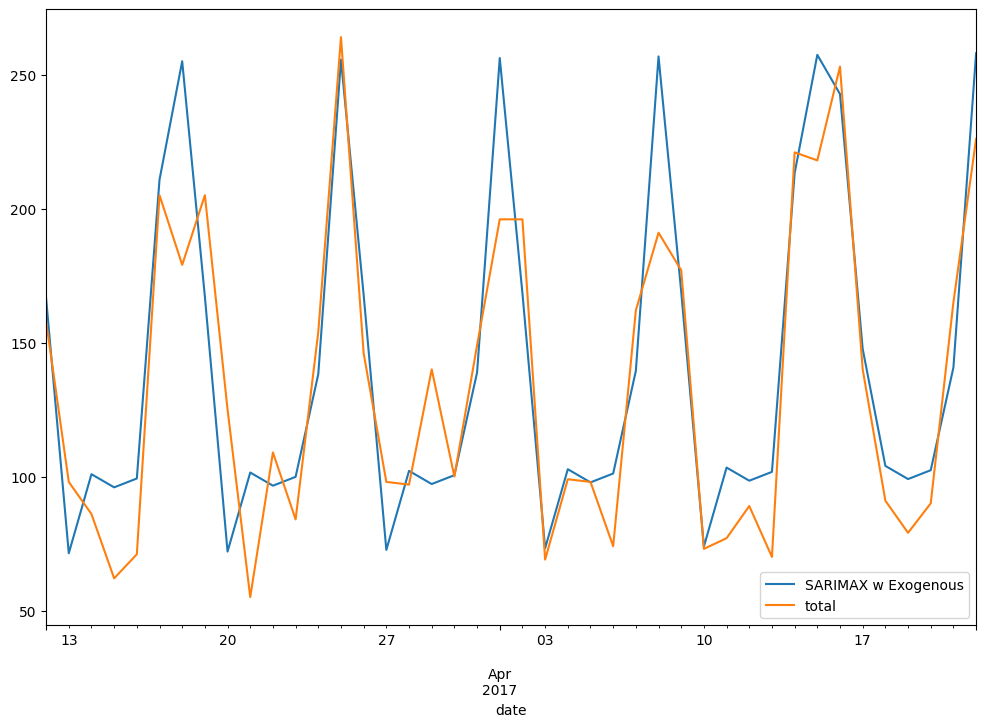

In [189]:
predictions_sarimax.plot(figsize=(12,8),legend=True)
test_df['total'].plot(legend=True)

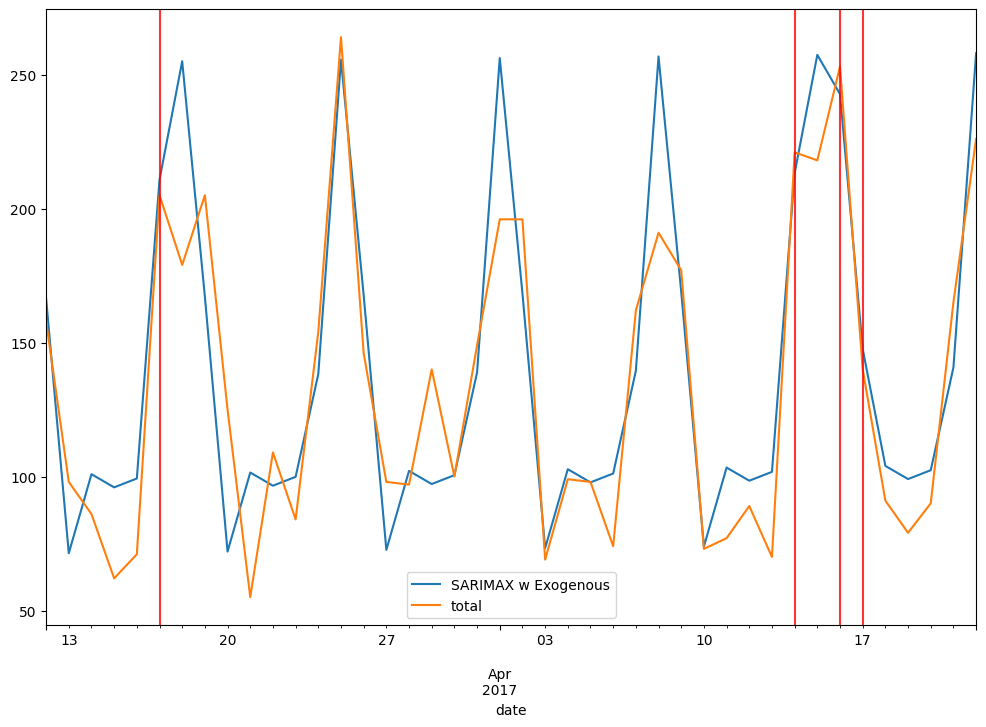

In [190]:
ax = predictions_sarimax.plot(figsize=(12,8),legend=True)
test_df['total'].plot(legend=True)

for day in test_df.query('holiday==1').index:
    ax.axvline(x=day,color='red',alpha=0.8)

In [191]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_df['total'],predictions_sarimax)
error

28.839829689104327

In [192]:
test_df['total'].mean()

134.26190476190476

In [193]:
# Forecast in the future
sarimax_model = SARIMAX(df1['total'],
                        exog=df1[['holiday']],
                        order=(1,0,1),
                        seasonal_order=(1,0,1,7),
                        enforce_invertibility=False)

In [194]:
res_sarimax = sarimax_model.fit()

In [195]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [197]:
df.iloc[477:485]

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0
2017-04-23     Sunday        0           na    NaN    NaN    NaN    NaN    NaN
2017-04-24     Monday        0           na    NaN    NaN    NaN    NaN    NaN
2017-04-25    Tuesday        0           na    NaN    NaN    NaN    NaN    NaN
2017-04-26  Wednesday        0           na    NaN    NaN    NaN    NaN    NaN
2017-04-27   Thursday        0           na    NaN    NaN    NaN    NaN    NaN
2017-04-28     Friday        0           na    NaN    NaN    NaN    NaN    NaN
2017-04-29   Saturday        0           na    NaN    NaN    NaN    NaN    NaN

In [199]:
exog_fcast = df[478:][['holiday']]
exog_fcast.head()

holiday
date               
2017-04-23        0
2017-04-24        0
2017-04-25        0
2017-04-26        0
2017-04-27        0

In [200]:
fcast = res_sarimax.predict(start=len(df1),
                            end=len(df1)+38,
                            exog=exog_fcast).rename('Final SARIMAX Forecast')

<AxesSubplot:xlabel='date'>

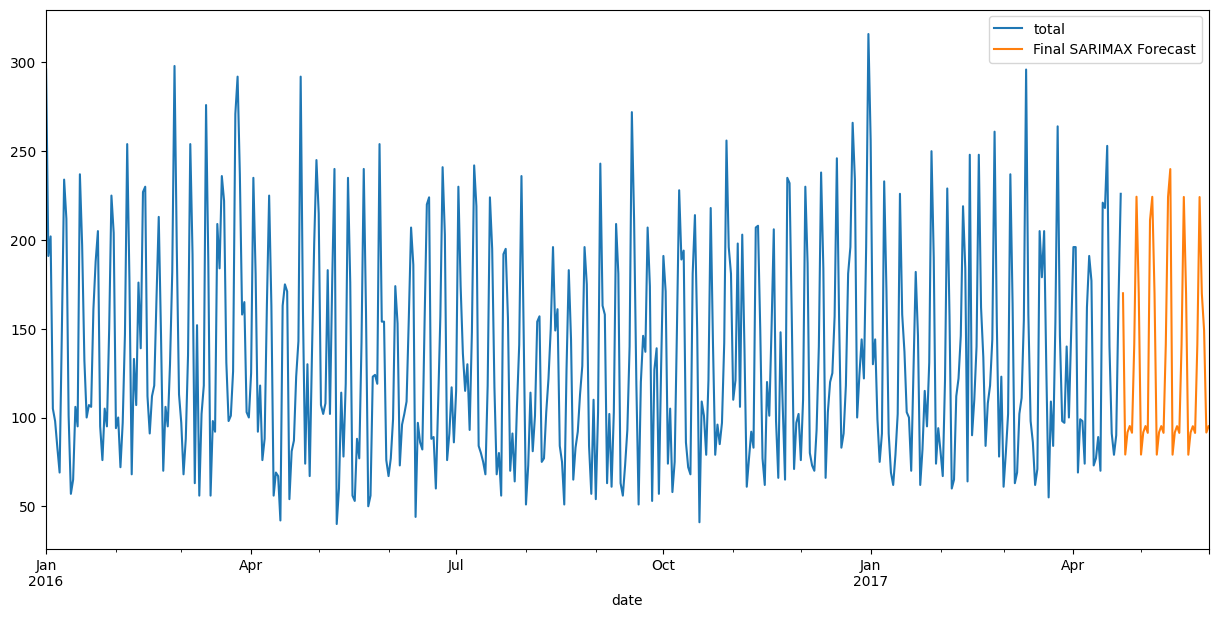

In [201]:
df1['total'].plot(legend=True)
fcast.plot(figsize=(15,7),legend=True)

<AxesSubplot:xlabel='date'>

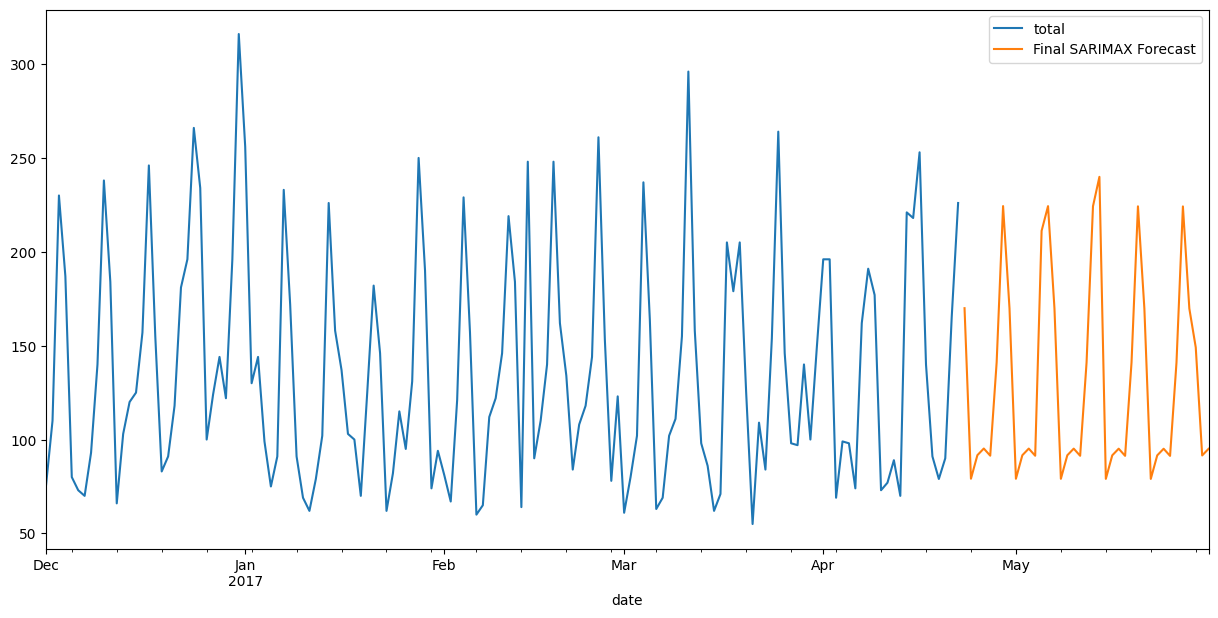

In [203]:
df1['total']['2016-12-01':].plot(legend=True)
fcast.plot(figsize=(15,7),legend=True)

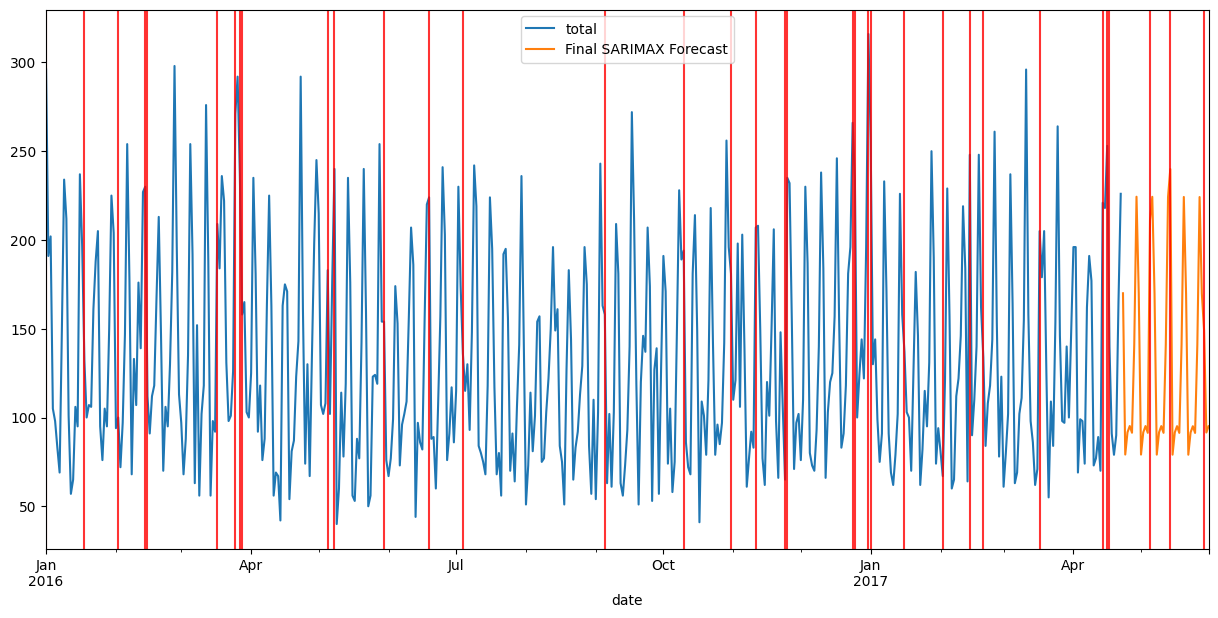

In [207]:
# Add in holiday info

ax = df1['total'].plot(legend=True)
fcast.plot(figsize=(15,7),legend=True)


for day in df.query('holiday==1').index:
    ax.axvline(x=day,
               color='red',
               alpha=0.8)

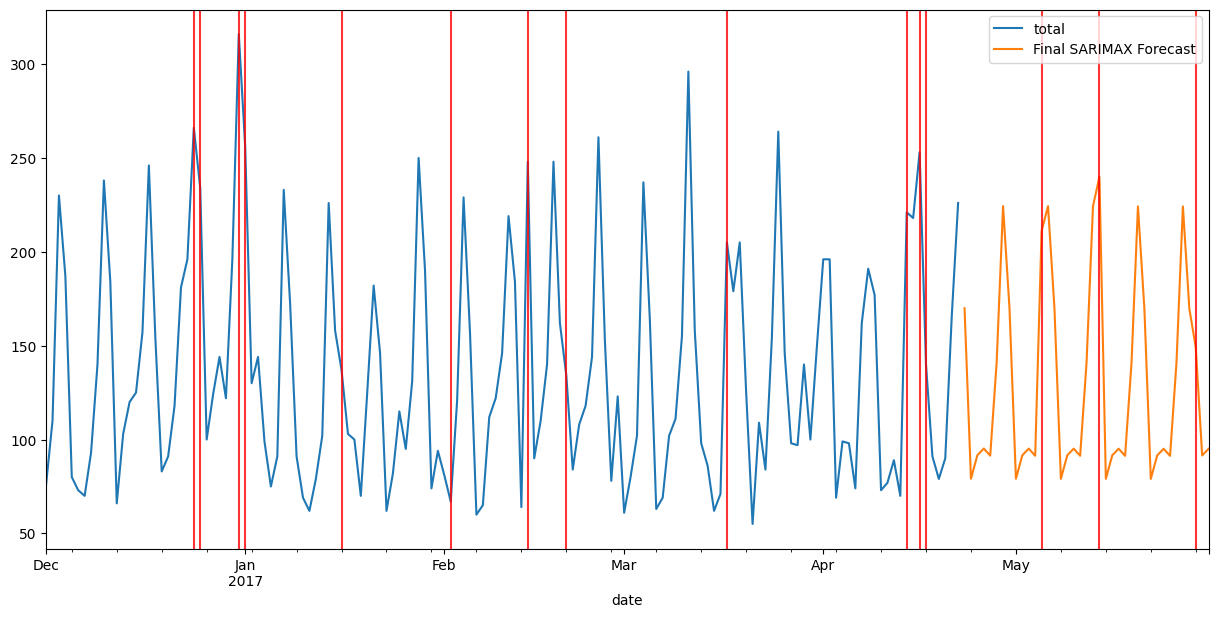

In [206]:
# Add in holiday info

ax = df1['total']['2016-12-01':].plot(legend=True)
fcast.plot(figsize=(15,7),legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day,
               color='red',
               alpha=0.8)

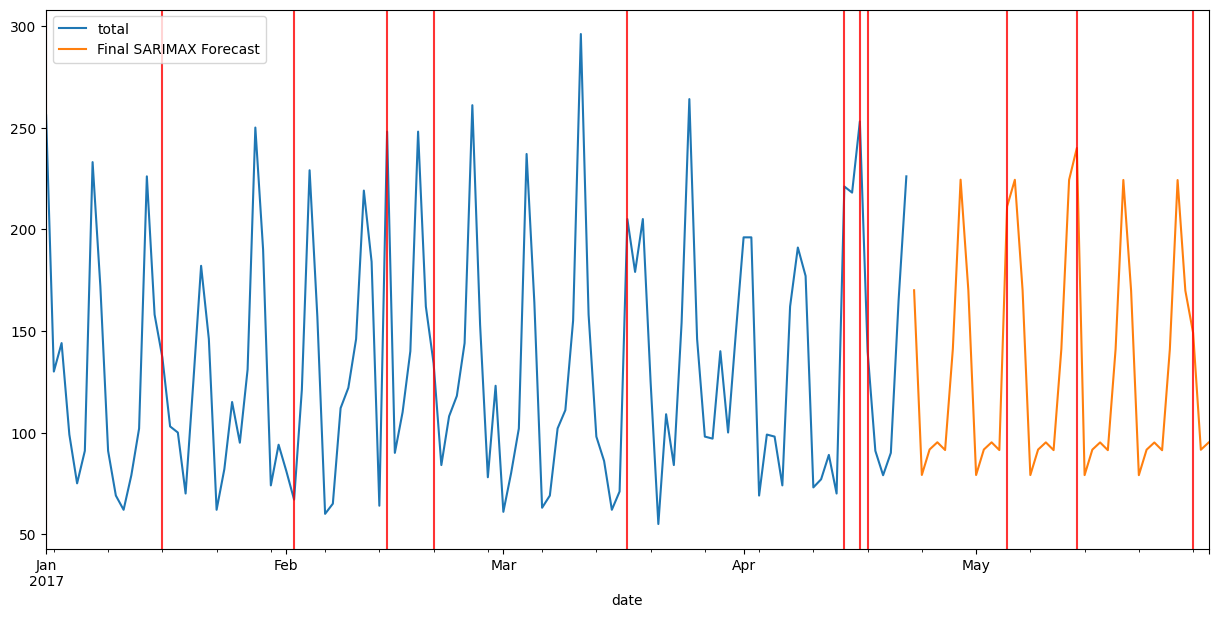

In [208]:
# Add in holiday info

ax = df1['total']['2017-01-01':].plot(legend=True)
fcast.plot(figsize=(15,7),legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day,
               color='red',
               alpha=0.8)

# Vector AutoRegression - VAR

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:

# Load specific forecasting tools
from statsmodels.tsa.api import VAR
# from statsmodels.tsa.api import DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [4]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load datasets
df = pd.read_csv('Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [6]:
df.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

In [7]:
sp.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

In [8]:
df = df.join(sp)

In [9]:
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

In [11]:
df.shape

(252, 2)

In [12]:
df.dropna()

Money  Spending
Date                         
1995-01-01   3492.4    4851.2
1995-02-01   3489.9    4850.8
1995-03-01   3491.1    4885.4
1995-04-01   3499.2    4890.2
1995-05-01   3524.2    4933.1
...             ...       ...
2015-08-01  12096.8   12394.0
2015-09-01  12153.8   12392.8
2015-10-01  12187.7   12416.1
2015-11-01  12277.4   12450.1
2015-12-01  12335.9   12469.1

[252 rows x 2 columns]

In [14]:
df.shape

(252, 2)

<AxesSubplot:xlabel='Date'>

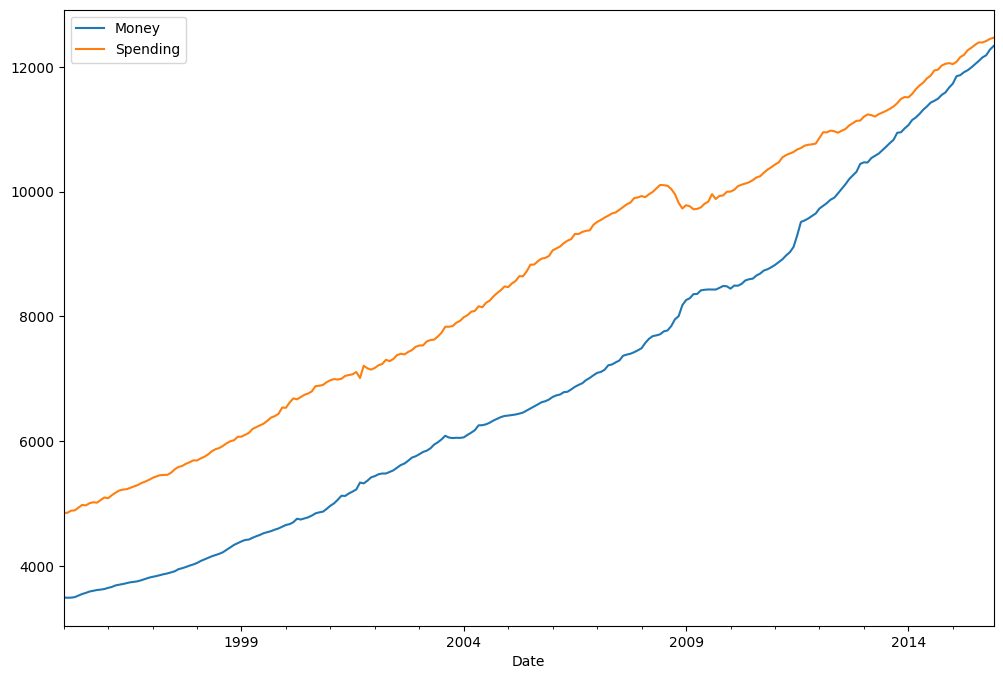

In [15]:
df.plot(figsize=(12,8))

In [16]:
# Test for stationarity

def adf_test(series,title=''):
    """
    Pass in time series and an optinal title, returns an ADF report
    """
    print(f"Augmented Dickey-Fuller test: {title}")
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [17]:
adf_test(df['Money'])

Augmented Dickey-Fuller test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [18]:
adf_test(df['Spending'])

Augmented Dickey-Fuller test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [19]:
# Take first order difference of df
# df.diff()
df_transformed = df.diff()

In [20]:
df_transformed.head()

Money  Spending
Date                       
1995-01-01    NaN       NaN
1995-02-01   -2.5      -0.4
1995-03-01    1.2      34.6
1995-04-01    8.1       4.8
1995-05-01   25.0      42.9

In [21]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [22]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
df_transformed.shape

(252, 2)

In [24]:
# since money col is not yet stationary, we'll have to apply a second order different to both series.
# Second order differencing
df_transformed = df_transformed.diff().dropna()

In [25]:
df_transformed

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7
...           ...       ...
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

[250 rows x 2 columns]

In [26]:
# doing adf_test again
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [27]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [28]:
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [30]:
df_transformed.shape

(250, 2)

In [31]:
# Number of Observations
nobs = 12

In [32]:
train = df_transformed[:-nobs]  # start = beginning of df --> -12 from the end
test = df_transformed[-nobs:]   # start = at -12 from end of df --> go to the end of df

In [33]:
test

Money  Spending
Date                       
2015-01-01  -15.5     -26.6
2015-02-01   56.1      52.4
2015-03-01 -102.8      39.5
2015-04-01   30.9     -40.4
2015-05-01  -15.8      38.8
2015-06-01   14.0     -34.1
2015-07-01    6.7       6.9
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

# GridSearch for Order p AR of VAR model

In [35]:
model = VAR(train)

for p in range(8):
    results = model.fit(p)
    print(f"Order {p}")
    print(f"AIC: {results.aic}")
    # print('\n')

Order 0
AIC: 14.74710921809045
Order 1
AIC: 14.178610495220896
Order 2
AIC: 13.955189367163705
Order 3
AIC: 13.849518291541038
Order 4
AIC: 13.827950574458281
Order 5
AIC: 13.78730034460964
Order 6
AIC: 13.799076756885809
Order 7
AIC: 13.797638727913972


In [38]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Mar, 2023
Time:                     19:01:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [44]:
# Grab 5 lagged values, right before test set starts!
# get numpy array
# train.values.shape
lagged_values = train.values[-5:]

In [46]:
z = results.forecast(y=lagged_values,
                 steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [ ]:
# test

In [47]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [48]:
df_forecast = pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])
df_forecast

Money_2d  Spending_2d
2015-01-01 -16.995276    36.149820
2015-02-01  -3.174038   -11.450298
2015-03-01  -0.377725    -6.684969
2015-04-01  -2.602233     5.479458
2015-05-01   4.228557    -2.443365
2015-06-01   1.559393     0.387639
2015-07-01  -0.998410     3.883680
2015-08-01   0.364510    -2.356101
2015-09-01  -1.210627    -1.224147
2015-10-01   0.225877     0.786927
2015-11-01   1.338939     0.180974
2015-12-01  -0.218585     0.212750

## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [51]:
# reversing differences

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [52]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [53]:
df_forecast.head()

Money_2d  Spending_2d    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -16.995276    36.149820  61.604724   11731.704724   46.749820   
2015-02-01  -3.174038   -11.450298  58.430686   11790.135410   35.299522   
2015-03-01  -0.377725    -6.684969  58.052961   11848.188371   28.614552   
2015-04-01  -2.602233     5.479458  55.450728   11903.639099   34.094010   
2015-05-01   4.228557    -2.443365  59.679285   11963.318384   31.650645   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549

In [54]:
test_range = df[-nobs:]

<AxesSubplot:xlabel='Date'>

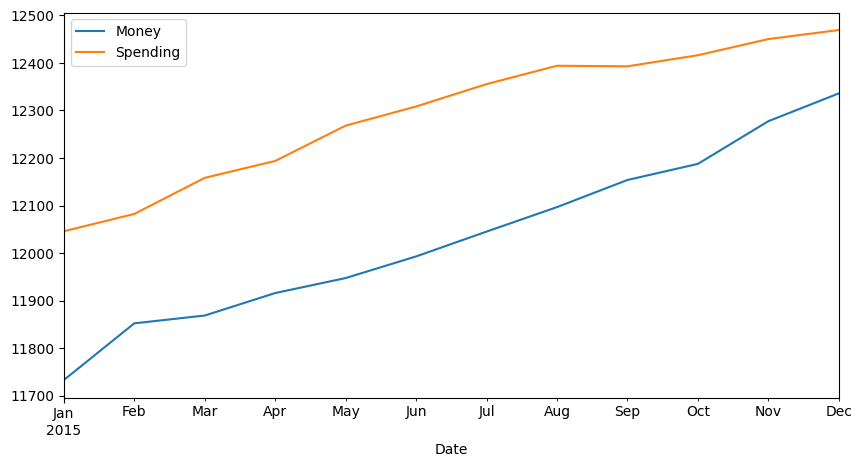

In [60]:
test_range.plot(figsize=(10,5))

<AxesSubplot:>

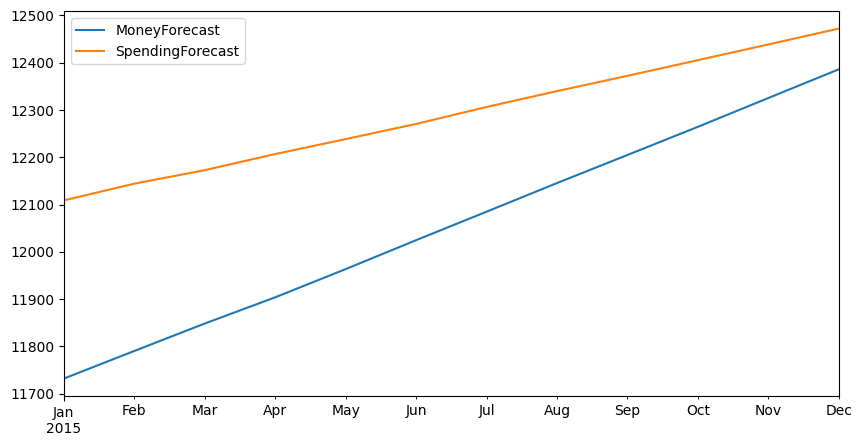

In [61]:
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

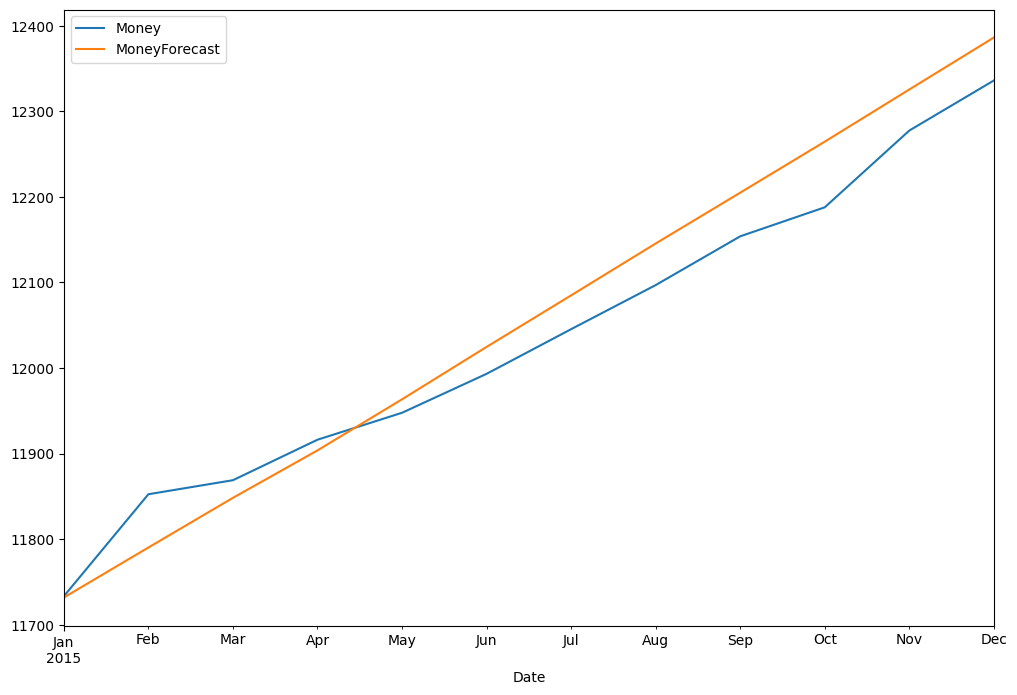

In [62]:
test_range['Money'].plot(figsize=(12,8),legend=True)
df_forecast['MoneyForecast'].plot(legend=True)

<AxesSubplot:xlabel='Date'>

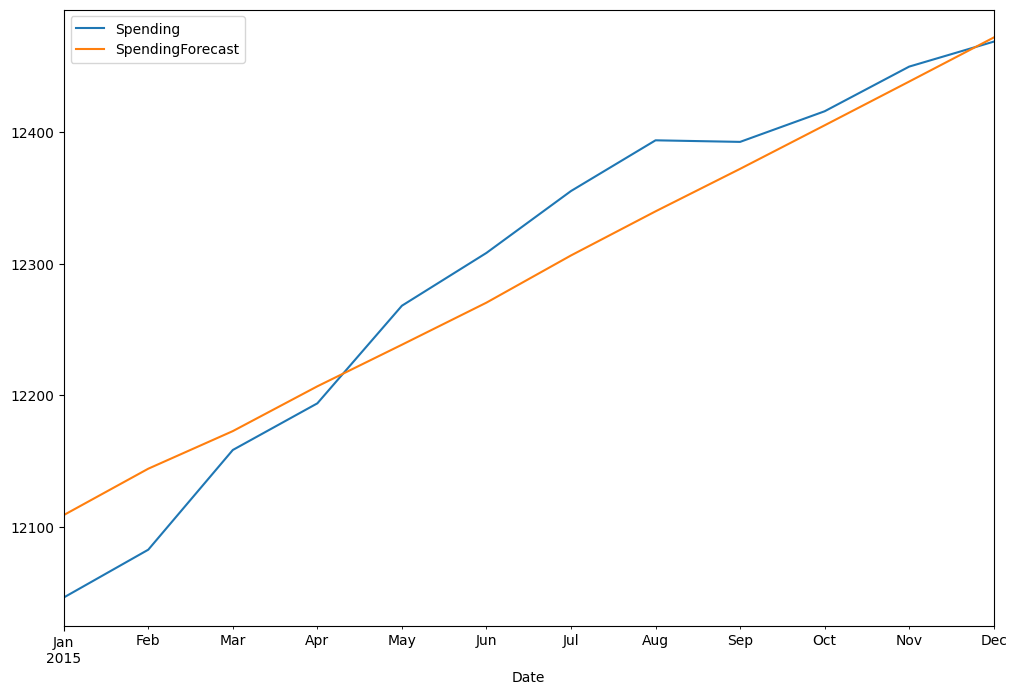

In [63]:
test_range['Spending'].plot(figsize=(12,8),legend=True)
df_forecast['SpendingForecast'].plot(legend=True)

In [64]:
error = rmse(test_range['Money'],
             df_forecast['MoneyForecast'])
error

43.710496535589265

In [65]:
test_range['Money'].mean()

12034.008333333333

In [66]:
error_spending = rmse(test_range['Spending'],
             df_forecast['SpendingForecast'])
error_spending

37.00117516940808

In [67]:
test_range['Spending'].mean()

12294.533333333335

# Vector AutoRegression Moving Average - VARMA

In [69]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [70]:
df = df.join(sp)
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

In [71]:
df = df.dropna()
df.shape

(252, 2)

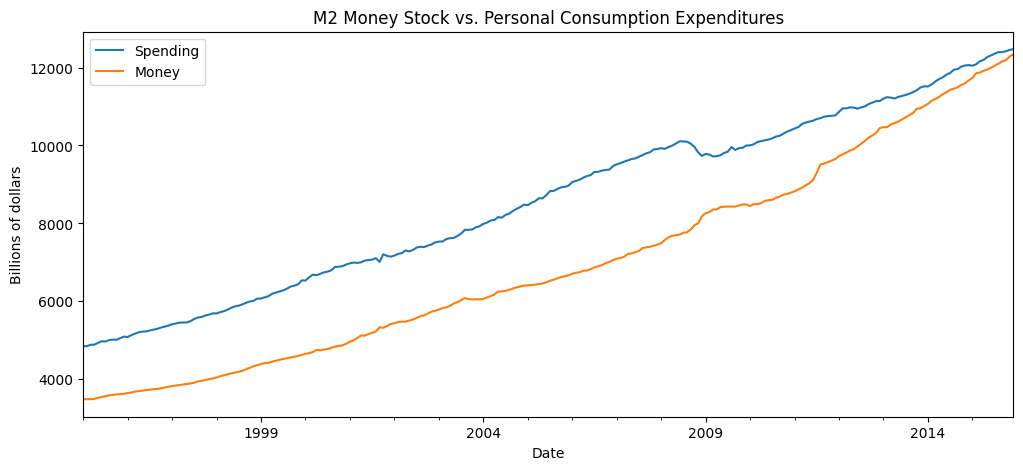

In [72]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

## Test for stationarity, perform any necessary transformations
In the previous section we applied the augmented Dickey-Fuller test and found that a second-order difference achieved stationarity. In this section we'll perform the <strong>auto_arima</strong> prediction to identify optimal $p$ and $q$ orders.

In [73]:
# INCLUDED HERE IF YOU CHOOSE TO USE IT
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<div class="alert alert-info"><strong>NOTE: </strong> When performing the auto_arima function we're likely to see a <tt><font color=black>ConvergenceWarning: Maximum Likelihood optimization failed to converge.</font></tt> This is not unusual in models which have to estimate a large number of parameters. However, we can override the maximum iterations default of 50, and pass an arbitrarily large number with <tt>maxiter=1000</tt>. We'll see this come up again when we fit our model.</div>  

In [74]:
auto_arima(df['Money'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [75]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [76]:
df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [77]:
len(df_transformed)

250

## Train/test/split
It is useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [78]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [79]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


## Fit the VARMA(1,2) Model
This may take awhile.

In [80]:
model = VARMAX(train, order=(1,2), trend='c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     ['Money', 'Spending']   No. Observations:                  238
Model:                        VARMA(1,2)   Log Likelihood               -2286.177
                             + intercept   AIC                           4606.354
Date:                   Sun, 12 Mar 2023   BIC                           4665.383
Time:                           19:35:01   HQIC                          4630.144
Sample:                       03-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.91, 0.00   Jarque-Bera (JB):       532.42, 108.98
Prob(Q):                        0.34, 0.96   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         5.50, 2.94   Skew:                      1.31, -0.32
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   9.84, 6.25
                            Results for equation Money                            
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0409      1.047     -0.039      0.969      -2.093       2.012
L1.Money          -1.1139      4.436     -0.251      0.802      -9.808       7.580
L1.Spending        2.7636      9.451      0.292      0.770     -15.760      21.287
L1.e(Money)        0.3536      4.420      0.080      0.936      -8.310       9.017
L1.e(Spending)    -2.8940      9.454     -0.306      0.760     -21.424      15.637
L2.e(Money)       -1.4438      4.722     -0.306      0.760     -10.698       7.811
L2.e(Spending)     2.5366      8.279      0.306      0.759     -13.689      18.762
                          Results for equation Spending                           
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0759      0.304      0.250      0.803      -0.520       0.672
L1.Money          -0.2838      2.179     -0.130      0.896      -4.554       3.986
L1.Spending        0.8303      4.466      0.186      0.853      -7.923       9.584
L1.e(Money)        0.4074      2.247      0.181      0.856      -3.998       4.812
L1.e(Spending)    -1.7744      4.441     -0.400      0.689     -10.478       6.929
L2.e(Money)       -0.4029      2.393     -0.168      0.866      -5.094       4.288
L2.e(Spending)     0.7943      3.870      0.205      0.837      -6.790       8.379
                                  Error covariance matrix                                  
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sqrt.var.Money             26.1234      2.061     12.673      0.000      22.083      30.164
sqrt.cov.Money.Spending   -10.7844      1.938     -5.566      0.000     -14.582      -6.987
sqrt.var.Spending          33.8339      1.282     26.401      0.000      31.322      36.346
===========================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict the next 12 values
Unlike the VAR model we used in the previous section, the VARMAX <tt>.forecast()</tt> function won't require that we pass in a number of previous observations, and it will provide an extended DateTime index.

In [81]:
df_forecast = results.forecast(12)
df_forecast

Money   Spending
2015-01-01 -10.737028  37.666972
2015-02-01 -11.291961  -4.207931
2015-03-01   0.908876  -0.213768
2015-04-01  -1.644085  -0.359450
2015-05-01   0.797178   0.243995
2015-06-01  -0.254601   0.052320
2015-07-01   0.387318   0.191616
2015-08-01   0.057209   0.125128
2015-09-01   0.241188   0.163592
2015-10-01   0.142543   0.143324
2015-11-01   0.196417   0.154486
2015-12-01   0.167252   0.148468

## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [82]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [83]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [84]:
df_forecast

Money   Spending    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -10.737028  37.666972  67.862972   11659.362972   48.266972   
2015-02-01 -11.291961  -4.207931  56.571011   11648.071011   44.059042   
2015-03-01   0.908876  -0.213768  57.479887   11648.979887   43.845274   
2015-04-01  -1.644085  -0.359450  55.835802   11647.335802   43.485824   
2015-05-01   0.797178   0.243995  56.632979   11648.132979   43.729819   
2015-06-01  -0.254601   0.052320  56.378378   11647.878378   43.782138   
2015-07-01   0.387318   0.191616  56.765697   11648.265697   43.973755   
2015-08-01   0.057209   0.125128  56.822906   11648.322906   44.098883   
2015-09-01   0.241188   0.163592  57.064094   11648.564094   44.262475   
2015-10-01   0.142543   0.143324  57.206637   11648.706637   44.405799   
2015-11-01   0.196417   0.154486  57.403055   11648.903055   44.560285   
2015-12-01   0.167252   0.148468  57.570307   11649.070307   44.708753   

            SpendingForecast  
2015-01-01      12099.666972  
2015-02-01      12095.459042  
2015-03-01      12095.245274  
2015-04-01      12094.885824  
2015-05-01      12095.129819  
2015-06-01      12095.182138  
2015-07-01      12095.373755  
2015-08-01      12095.498883  
2015-09-01      12095.662475  
2015-10-01      12095.805799  
2015-11-01      12095.960285  
2015-12-01      12096.108753

In [85]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

Money  Spending  MoneyForecast  SpendingForecast
2015-01-01  11733.2   12046.0   11659.362972      12099.666972
2015-02-01  11852.4   12082.4   11648.071011      12095.459042
2015-03-01  11868.8   12158.3   11648.979887      12095.245274
2015-04-01  11916.1   12193.8   11647.335802      12094.885824
2015-05-01  11947.6   12268.1   11648.132979      12095.129819
2015-06-01  11993.1   12308.3   11647.878378      12095.182138
2015-07-01  12045.3   12355.4   11648.265697      12095.373755
2015-08-01  12096.8   12394.0   11648.322906      12095.498883
2015-09-01  12153.8   12392.8   11648.564094      12095.662475
2015-10-01  12187.7   12416.1   11648.706637      12095.805799
2015-11-01  12277.4   12450.1   11648.903055      12095.960285
2015-12-01  12335.9   12469.1   11649.070307      12096.108753

## Plot the results

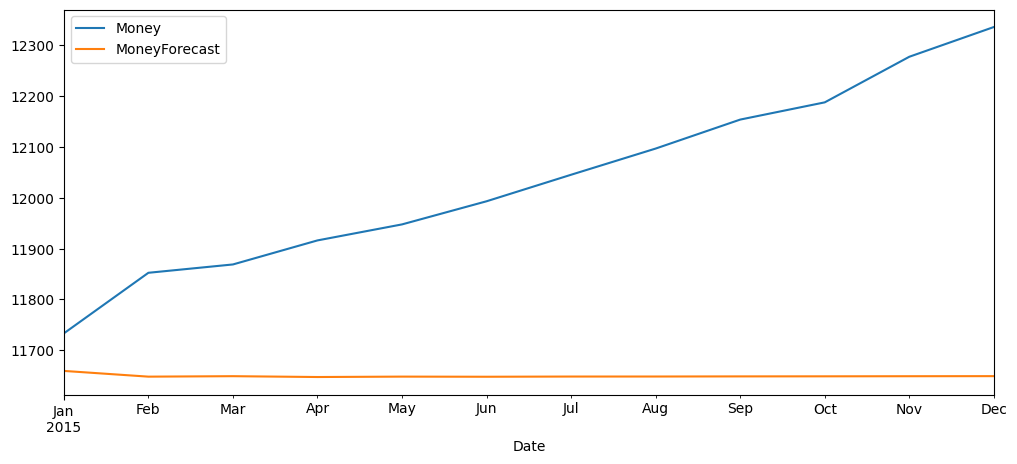

In [86]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

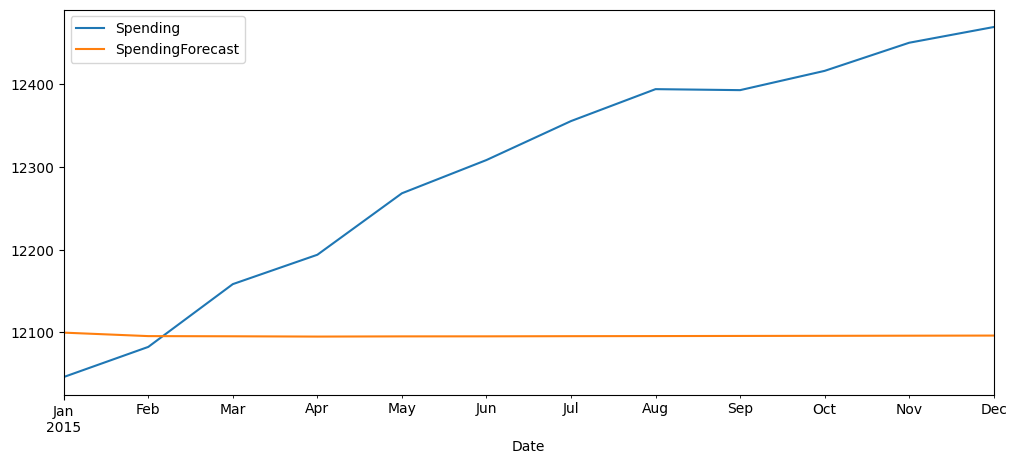

In [87]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [88]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 423.074


In [89]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 242.260


Clearly these results are less accurate than our earlier VAR(5) model. Still, this tells us something!
## Let's compare these results to individual ARMA(1,2) models

In [90]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults

### Money

In [91]:
model = ARMA(train['Money'],order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Money   No. Observations:                  238
Model:                     ARMA(1, 2)   Log Likelihood               -1117.710
Method:                       css-mle   S.D. of innovations             26.214
Date:                Sun, 12 Mar 2023   AIC                           2245.421
Time:                        19:35:36   BIC                           2262.782
Sample:                    03-01-1995   HQIC                          2252.418
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1814      0.029      6.302      0.000       0.125       0.238
ar.L1.Money    -0.3569      0.293     -1.217      0.223      -0.931       0.218
ma.L1.Money    -0.4087      0.260     -1.573      0.116      -0.918       0.101
ma.L2.Money    -0.5912      0.260     -2.278      0.023      -1.100      -0.083
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8023           +0.0000j            2.8023            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.6913           +0.0000j            1.6913            0.5000
-----------------------------------------------------------------------------
"""

In [92]:
start=len(train)
end=len(train)+len(test)-1
z1 = results.predict(start=start, end=end).rename('Money')
z1 = pd.DataFrame(z1)

In [93]:
z1

Money
2015-01-01 -14.499203
2015-02-01 -10.947071
2015-03-01   4.152629
2015-04-01  -1.235752
2015-05-01   0.687111
2015-06-01   0.000931
2015-07-01   0.245796
2015-08-01   0.158415
2015-09-01   0.189598
2015-10-01   0.178470
2015-11-01   0.182441
2015-12-01   0.181024

### Invert the Transformation, Evaluate the Forecast

In [94]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [95]:
z1

Money    Money1d  MoneyForecast
2015-01-01 -14.499203  64.100797   11734.200797
2015-02-01 -10.947071  53.153726   11787.354523
2015-03-01   4.152629  57.306355   11844.660877
2015-04-01  -1.235752  56.070603   11900.731480
2015-05-01   0.687111  56.757714   11957.489194
2015-06-01   0.000931  56.758645   12014.247839
2015-07-01   0.245796  57.004441   12071.252280
2015-08-01   0.158415  57.162856   12128.415136
2015-09-01   0.189598  57.352454   12185.767590
2015-10-01   0.178470  57.530924   12243.298514
2015-11-01   0.182441  57.713365   12301.011879
2015-12-01   0.181024  57.894389   12358.906267

In [96]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VARMA(1,2) RMSE: {RMSE1:.3f}')
print(f'Money  ARMA(1,2) RMSE: {RMSE3:.3f}')

Money VARMA(1,2) RMSE: 423.074
Money  ARMA(1,2) RMSE: 32.235


## Personal Spending

In [97]:
model = ARMA(train['Spending'],order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Spending   No. Observations:                  238
Model:                     ARMA(1, 2)   Log Likelihood               -1182.411
Method:                       css-mle   S.D. of innovations             34.661
Date:                Sun, 12 Mar 2023   AIC                           2374.823
Time:                        19:35:37   BIC                           2392.184
Sample:                    03-01-1995   HQIC                          2381.820
                         - 12-01-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0856      0.245      0.350      0.726      -0.394       0.565
ar.L1.Spending    -0.3403      0.511     -0.666      0.505      -1.342       0.661
ma.L1.Spending    -0.6451      0.521     -1.237      0.216      -1.667       0.377
ma.L2.Spending    -0.2139      0.485     -0.441      0.659      -1.165       0.737
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9388           +0.0000j            2.9388            0.5000
MA.1            1.1281           +0.0000j            1.1281            0.0000
MA.2           -4.1439           +0.0000j            4.1439            0.5000
-----------------------------------------------------------------------------
"""

In [98]:
start=len(train)
end=len(train)+len(test)-1
z2 = results.predict(start=start, end=end).rename('Spending')
z2 = pd.DataFrame(z2)
z2

Spending
2015-01-01  33.555849
2015-02-01  -3.338273
2015-03-01   1.250699
2015-04-01  -0.310828
2015-05-01   0.220526
2015-06-01   0.039718
2015-07-01   0.101243
2015-08-01   0.080307
2015-09-01   0.087431
2015-10-01   0.085007
2015-11-01   0.085832
2015-12-01   0.085551

### Invert the Transformation, Evaluate the Forecast

In [99]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [100]:
z2

Spending  Spending1d  SpendingForecast
2015-01-01  33.555849   44.155849      12106.155849
2015-02-01  -3.338273   40.817577      12146.973426
2015-03-01   1.250699   42.068275      12189.041701
2015-04-01  -0.310828   41.757448      12230.799149
2015-05-01   0.220526   41.977973      12272.777122
2015-06-01   0.039718   42.017691      12314.794813
2015-07-01   0.101243   42.118933      12356.913746
2015-08-01   0.080307   42.199240      12399.112987
2015-09-01   0.087431   42.286671      12441.399658
2015-10-01   0.085007   42.371678      12483.771336
2015-11-01   0.085832   42.457510      12526.228846
2015-12-01   0.085551   42.543061      12568.771907

In [101]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VARMA(1,2) RMSE: {RMSE2:.3f}')
print(f'Spending  ARMA(1,2) RMSE: {RMSE4:.3f}')

Spending VARMA(1,2) RMSE: 242.260
Spending  ARMA(1,2) RMSE: 52.334


<strong>CONCLUSION:</strong> It looks like the VARMA(1,2) model did a relatively poor job compared to simpler alternatives. This tells us that there is little or no interdepence between Money Stock and Personal Consumption Expenditures, at least for the timespan we investigated. This is helpful! By fitting a model and getting poor results we know more about the data than we did before.